# Comparison between the types for the ages and genders

Questions

- What are the differences between the type for the different combinations of ages and genders?
- Do we observe the same changes as globally?

# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [370]:
source("functions.R")

ERROR: Error in source("functions.R"): functions.R:167:112: unexpected ')'
166:             data = gene_vector %>% select(c(genes, !!as.name(x))) %>% deframe()
167:             return(suppressMessages(nullp(data, 'mm10', 'geneSymbol', plot.fit=F,  bias.data=gene_length_vec))))
                                                                                                                    ^


## Data

In [200]:
load("../results/dge/gene_length.RData")
load("../results/dge/filtered_metadata.RData")
load("../results/dge/dge.RData")
load("../results/dge/filtered_norm_counts.RData")
load("../results/dge/filtered_z_scores.RData")
load("../results/dge/dge_net_pal2.RData")
load("../results/dge/col_order.RData")
load("../results/dge/annot_col.RData")
load("../results/dge/genes_in_modules.RData")

In [342]:
dir_path = "type-effect/type_gender_age/"

# Differentially expressed genes

Extract DEG between GF and SPF for the different ages and genders combinations
- Threshold for adjusted p-value: 0.05
- Threshold for adjusted significant fold change: 1.5

Table with the factors

Info | M vs F | GF vs SPF | Middle-aged vs Young | Old vs Young | M & Middle-aged | M & Old | M & GF | GF & Middle-aged | GF & Old
--- | --- | --- | --- | --- | --- | --- | --- | --- | ---
GF vs SPF (F, Young) | | 1 | | | | | | |
GF vs SPF (M, Young) | | 1 | | | | | 1 | |
GF vs SPF (F, Middle-aged) | | 1 | | | | | | 1 |
GF vs SPF (M, Middle-aged) | | 1 | | | | | 1 | 1 |
GF vs SPF (F, Old) | | 1 | | | | | | | 1
GF vs SPF (M, Old) | | 1 | | | | | 1 | | 1

In [115]:
GF_SPF = list()
GF_SPF$'GF VS SPF (F, Young)' = get_results(dge, contrast=c(0,0,1,0,0,0,0,0,0,0))
GF_SPF$'GF VS SPF (M, Young)' = get_results(dge, contrast= c(0,0,1,0,0,0,0,1,0,0))
GF_SPF$'GF VS SPF (F, Middle-aged)' = get_results(dge, contrast= c(0,0,1,0,0,0,0,0,1,0))
GF_SPF$'GF VS SPF (M, Middle-aged)' = get_results(dge, contrast= c(0,0,1,0,0,0,0,1,1,0))
GF_SPF$'GF VS SPF (F, Old)' = get_results(dge, contrast= c(0,0,1,0,0,0,0,0,0,1))
GF_SPF$'GF VS SPF (M, Old)' = get_results(dge, contrast= c(0,0,1,0,0,0,0,1,0,1))
#GF_SPF$'GF VS SPF' = get_results(dge, contrast= c(0,0,1,0,0,0,0,1/2,1/3,1/3))

Extract the log2FC of the DEG

In [116]:
type_gender_age_deg = extract_DEG_log2FC(GF_SPF, dir_path)

# Stats

Using type as id variables


GF VS SPF (F, Young)
All DEG (Wald padj < 0.05)                            256                 
All over-expressed genes (Wald padj < 0.05 & FC > 0)  146                 
All under-expressed genes (Wald padj < 0.05 & FC < 0) 110                 
DEG (Wald padj < 0.05 & abs(FC) >= 1.5)               145                 
Over-expressed genes (Wald padj < 0.05 & FC >= 1.5)    92                 
Under-expressed genes (Wald padj < 0.05 & FC <= -1.5)  53                 
                                                      GF VS SPF (M, Young)
All DEG (Wald padj < 0.05)                            127                 
All over-expressed genes (Wald padj < 0.05 & FC > 0)   80                 
All under-expressed genes (Wald padj < 0.05 & FC < 0)  47                 
DEG (Wald padj < 0.05 & abs(FC) >= 1.5)                89                 
Over-expressed genes (Wald padj < 0.05 & FC >= 1.5)    58                 
Under-expressed genes (Wald padj < 0.05 & FC <= -1.5)  31                 
                                                      GF VS SPF (F, Middle-aged)
All DEG (Wald padj < 0.05)                            877                       
All over-expressed genes (Wald padj < 0.05 & FC > 0)  375                       
All under-expressed genes (Wald padj < 0.05 & FC < 0) 502                       
DEG (Wald padj < 0.05 & abs(FC) >= 1.5)               352                       
Over-expressed genes (Wald padj < 0.05 & FC >= 1.5)   136                       
Under-expressed genes (Wald padj < 0.05 & FC <= -1.5) 216                       
                                                      GF VS SPF (M, Middle-aged)
All DEG (Wald padj < 0.05)                            426                       
All over-expressed genes (Wald padj < 0.05 & FC > 0)  171                       
All under-expressed genes (Wald padj < 0.05 & FC < 0) 255                       
DEG (Wald padj < 0.05 & abs(FC) >= 1.5)               244                       
Over-expressed genes (Wald padj < 0.05 & FC >= 1.5)    84                       
Under-expressed genes (Wald padj < 0.05 & FC <= -1.5) 160                       
                                                      GF VS SPF (F, Old)
All DEG (Wald padj < 0.05)                            1930              
All over-expressed genes (Wald padj < 0.05 & FC > 0)   866              
All under-expressed genes (Wald padj < 0.05 & FC < 0) 1064              
DEG (Wald padj < 0.05 & abs(FC) >= 1.5)                999              
Over-expressed genes (Wald padj < 0.05 & FC >= 1.5)    311              
Under-expressed genes (Wald padj < 0.05 & FC <= -1.5)  688              
                                                      GF VS SPF (M, Old)
All DEG (Wald padj < 0.05)                            3329              
All over-expressed genes (Wald padj < 0.05 & FC > 0)  1496              
All under-expressed genes (Wald padj < 0.05 & FC < 0) 1833              
DEG (Wald padj < 0.05 & abs(FC) >= 1.5)               1265              
Over-expressed genes (Wald padj < 0.05 & FC >= 1.5)    324              
Under-expressed genes (Wald padj < 0.05 & FC <= -1.5)  941

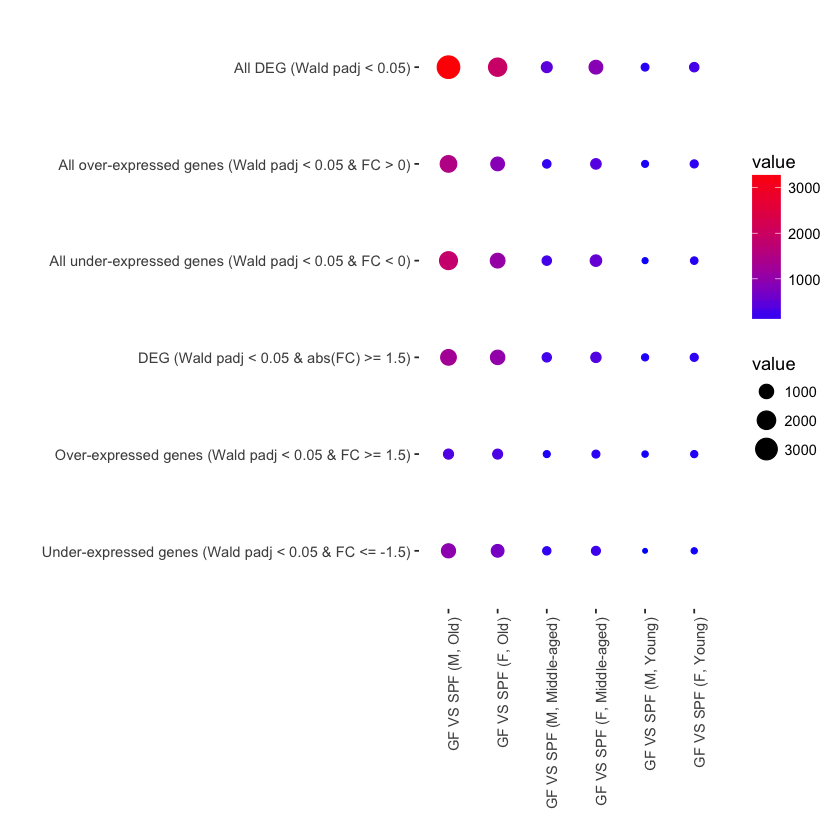

In [117]:
type_gender_age_deg = extract_DEG_stats(type_gender_age_deg)
type_gender_age_deg$stat

All DEG (Wald padj < 0.05)

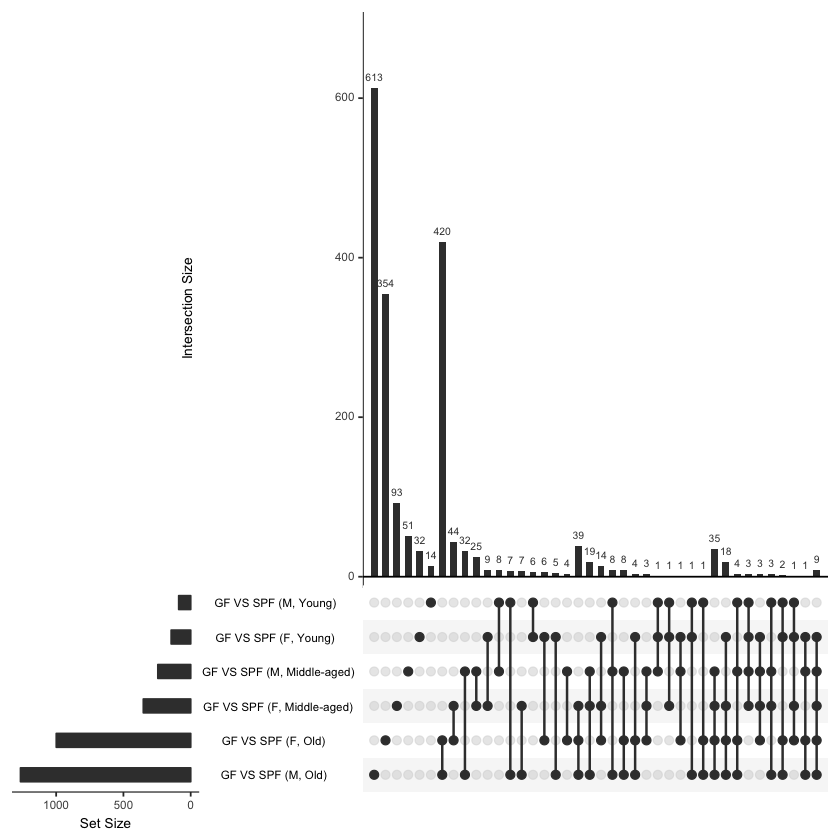

In [121]:
plot_sign_DEG_upset(type_gender_age_deg)

DEG (Wald padj < 0.05 & abs(FC) > 1.5)

pdf 
  2

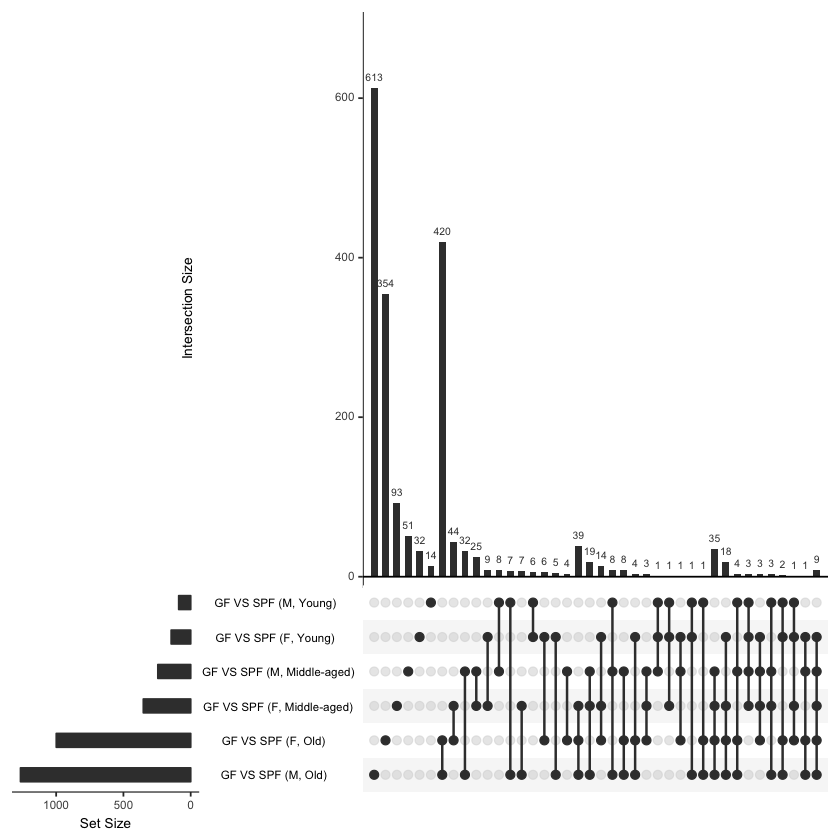

In [125]:
pdf('../results/dge/type-effect/type_gender_age/sign_FC_DEG_upset.pdf')
plot_sign_FC_DEG_upset(type_gender_age_deg)
dev.off()
plot_sign_FC_DEG_upset(type_gender_age_deg)

# DEG (Wald padj < 0.05 & abs(FC) > 1.5)

## Log2FC

comp      gender age        
GF VS SPF (F, Young)       GF VS SPF F      Young      
GF VS SPF (M, Young)       GF VS SPF M      Young      
GF VS SPF (F, Middle-aged) GF VS SPF F      Middle-Aged
GF VS SPF (M, Middle-aged) GF VS SPF M      Middle-Aged
GF VS SPF (F, Old)         GF VS SPF F      Old        
GF VS SPF (M, Old)         GF VS SPF M      Old

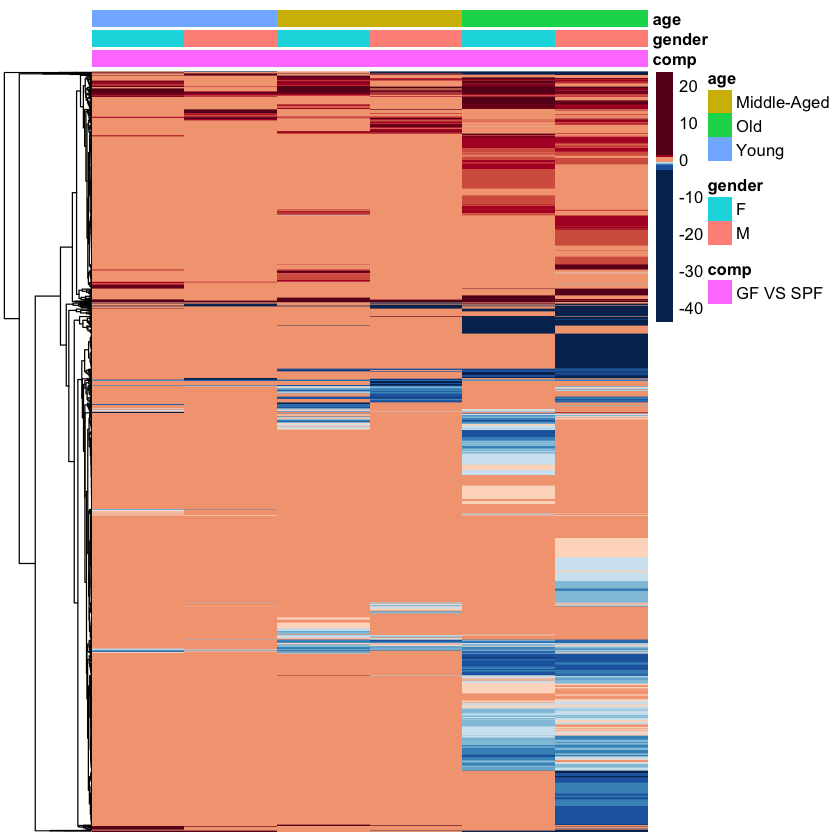

In [128]:
data = type_gender_age_deg$sign_fc_deg %>% select(-genes)
fc_annot = data.frame(comp = rep("GF VS SPF",2),
                      gender = rep(c("F","M"), 3),
                      age = c(rep("Young", 2), rep("Middle-Aged", 2), rep("Old", 2)),
                      row.names = colnames(data))
fc_annot
plot_fc_heatmap(data, fc_annot)

## Z-score

In [164]:
comps = list(
    "GF VS SPF (F, Young)" = c(grep("SPF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "GF VS SPF (F, Middle-aged)" = c(grep("SPF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "GF VS SPF (F, Old)" = c(grep("SPF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "GF VS SPF (M, Young)" = c(grep("SPF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "GF VS SPF (M, Middle-aged)" = c(grep("SPF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "GF VS SPF (M, Old)" = c(grep("SPF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE))
)

### Column order: gender - age - type

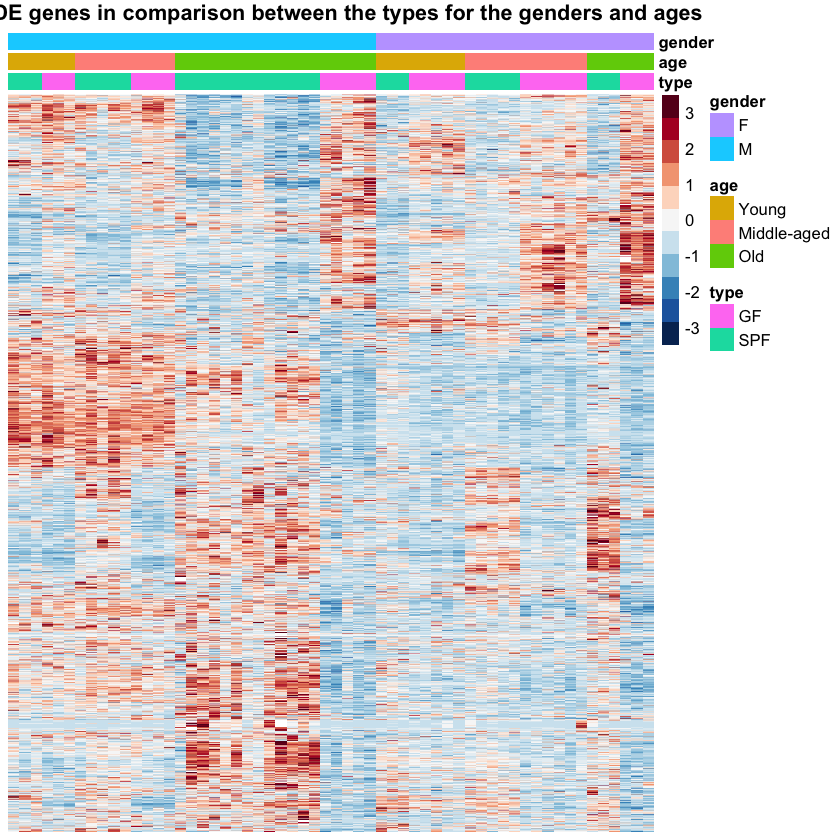

In [162]:
plot_z_score_heatmap(z_scores,
                     type_gender_age_deg$sign_fc_deg$genes,
                     col_order$gat,
                     annot_col$gat,
                     "All DE genes in comparison between the types for the genders and ages",
                     col_order$gat)

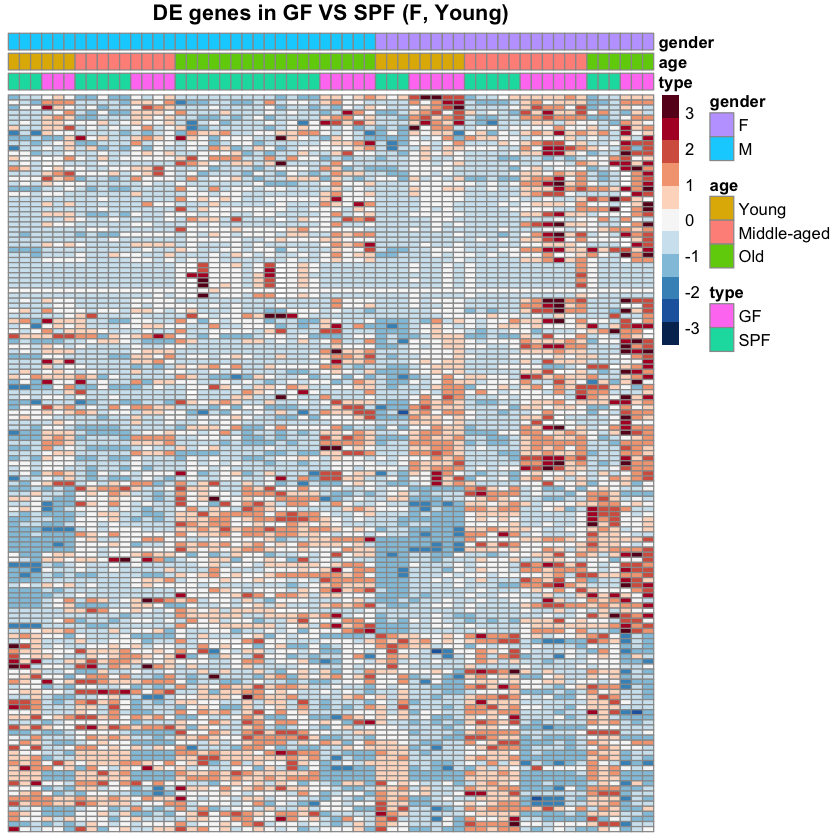

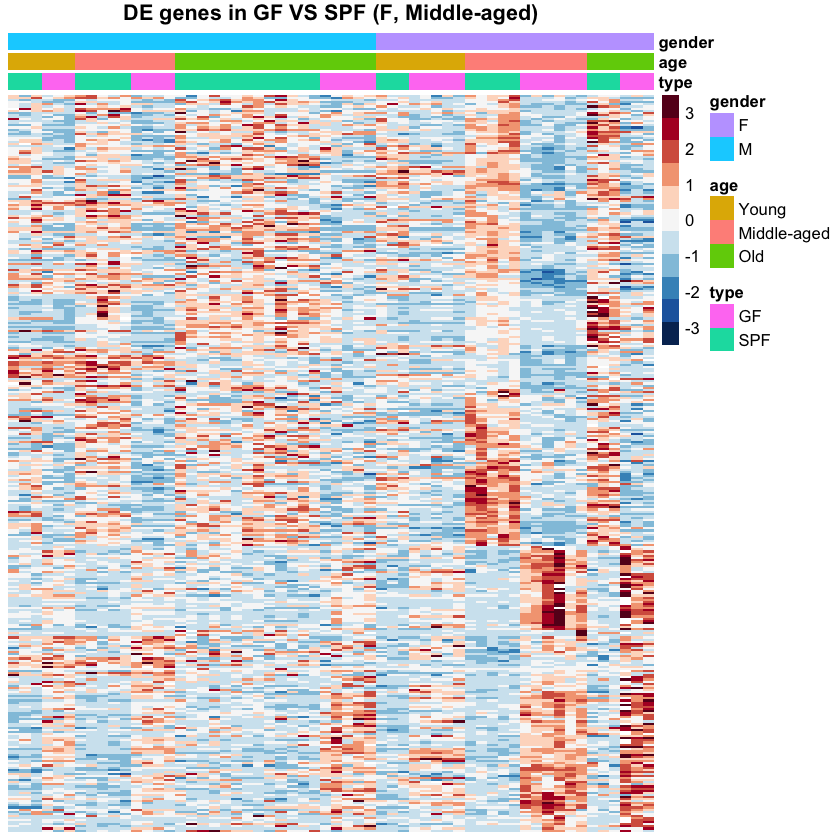

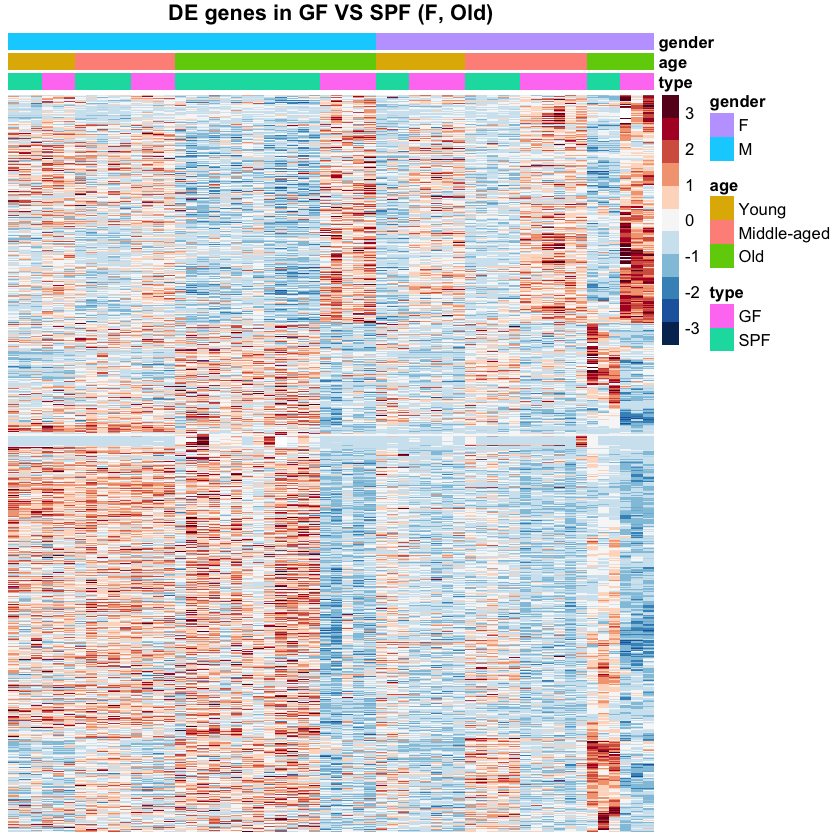

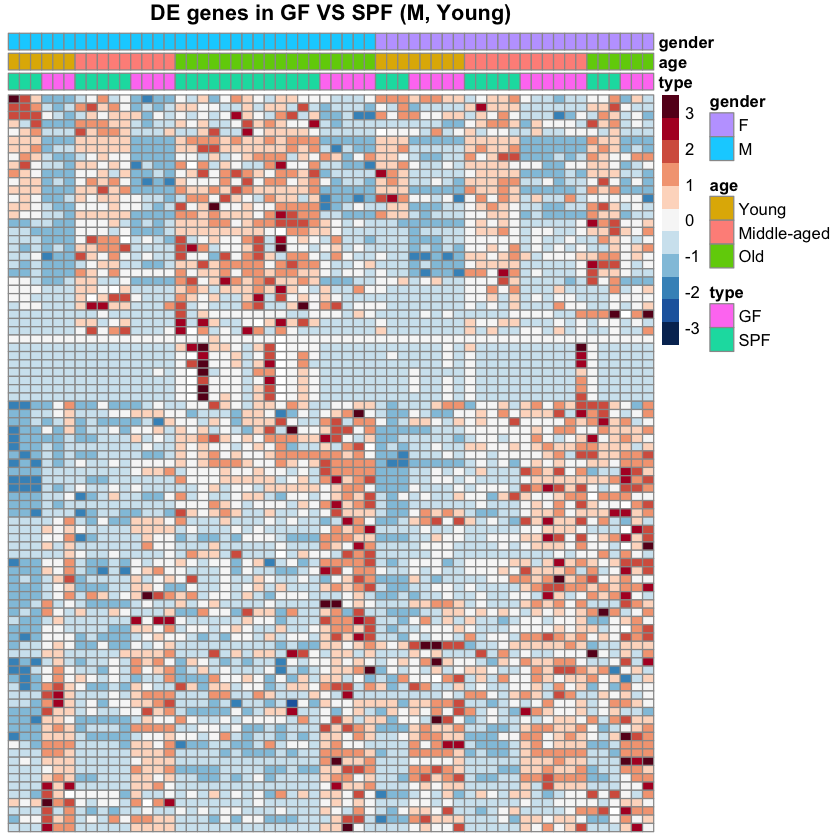

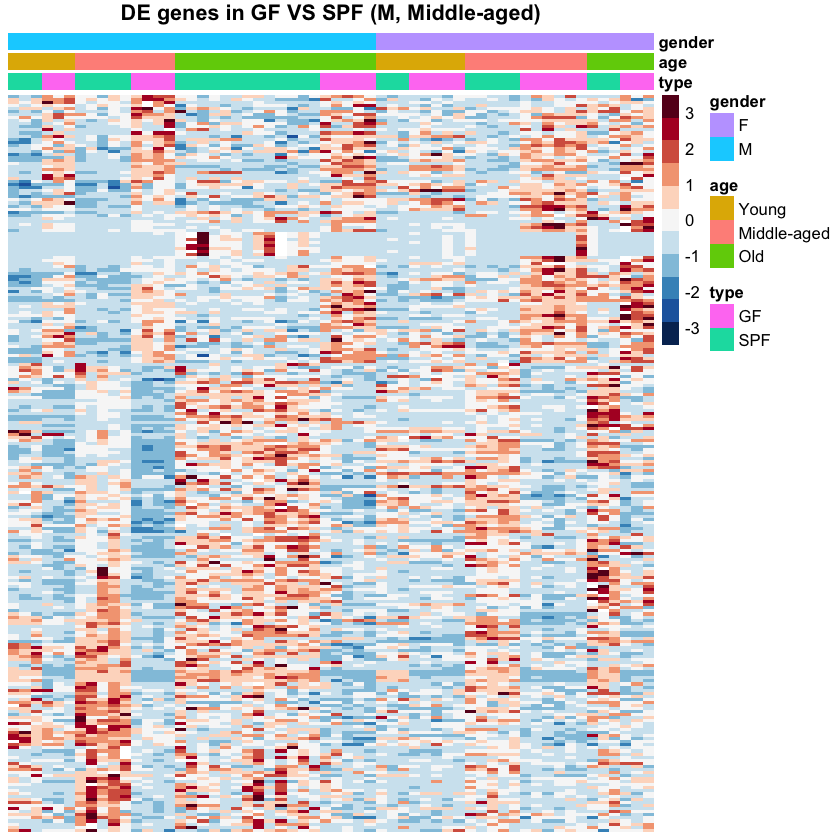

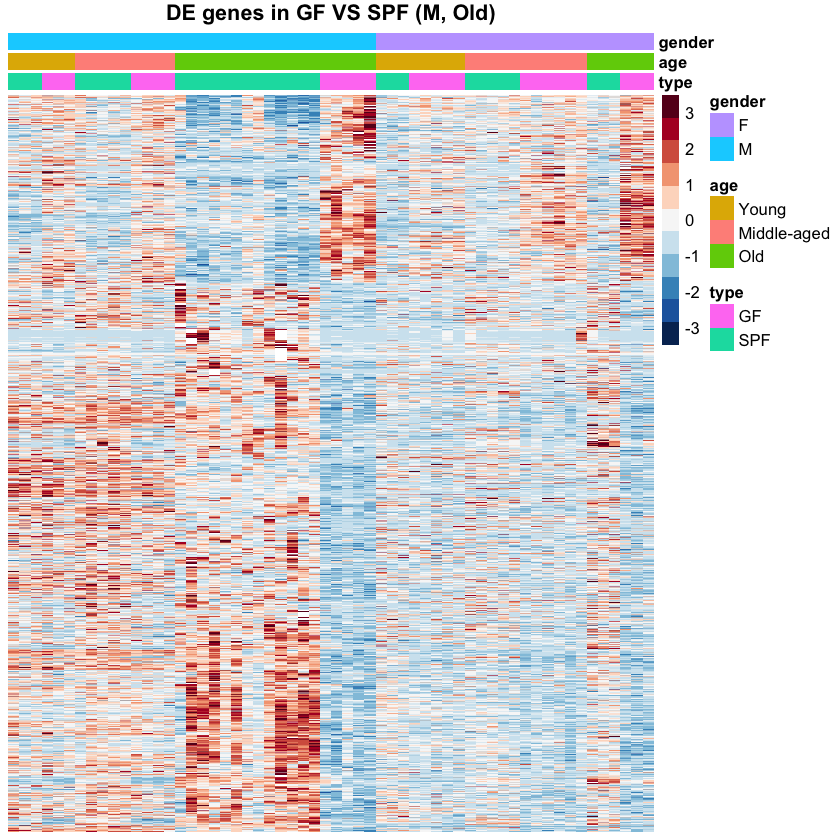

In [172]:
for(comp in names(comps)){
    plot_z_score_heatmap(z_scores,
        type_gender_age_deg$sign_fc_deg %>% filter(!is.na((!!as.name(comp)))) %>% pull(genes),
        col_order$gat,
        annot_col$gat,
        paste("DE genes in", comp),
        comps[[comp]])
}

### Column order: age - gender - type

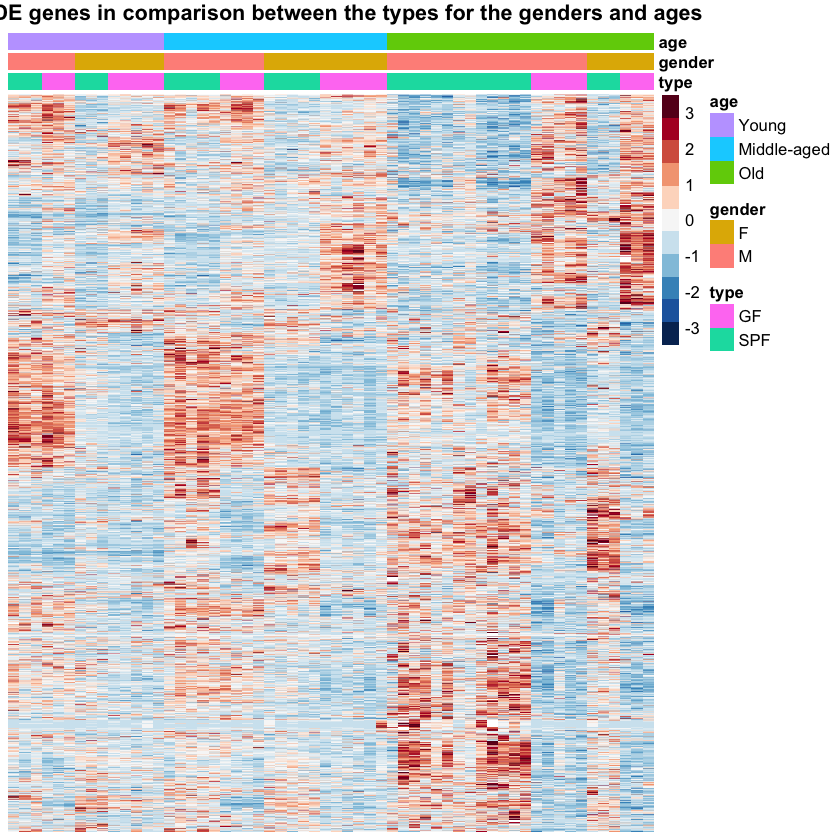

In [174]:
plot_z_score_heatmap(z_scores,
                     type_gender_age_deg$sign_fc_deg$genes,
                     col_order$agt,
                     annot_col$agt,
                     "All DE genes in comparison between the types for the genders and ages",
                     col_order$agt)

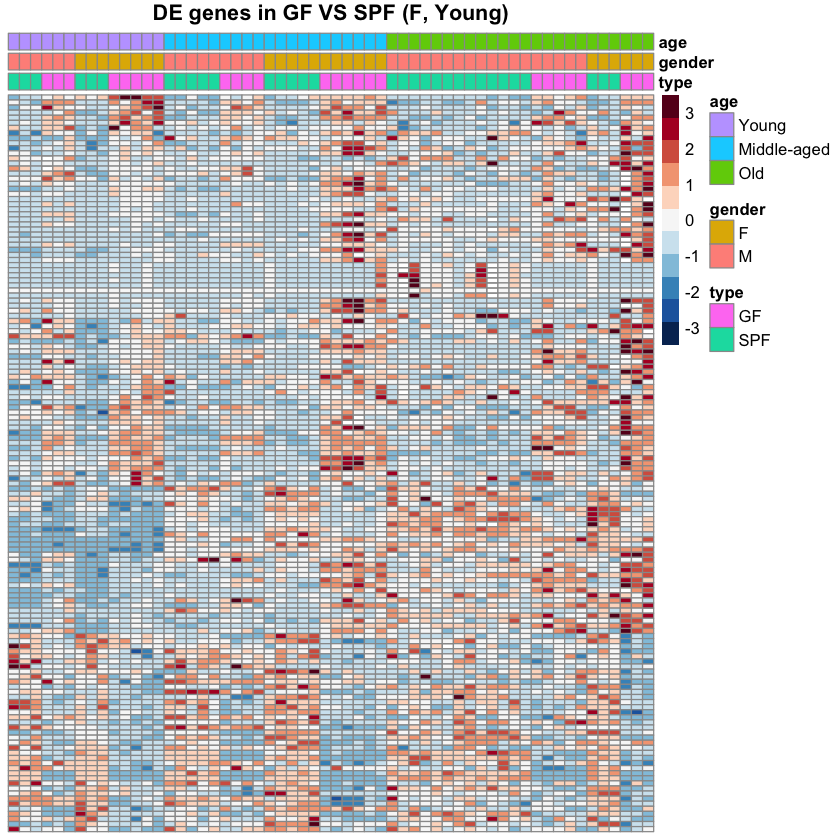

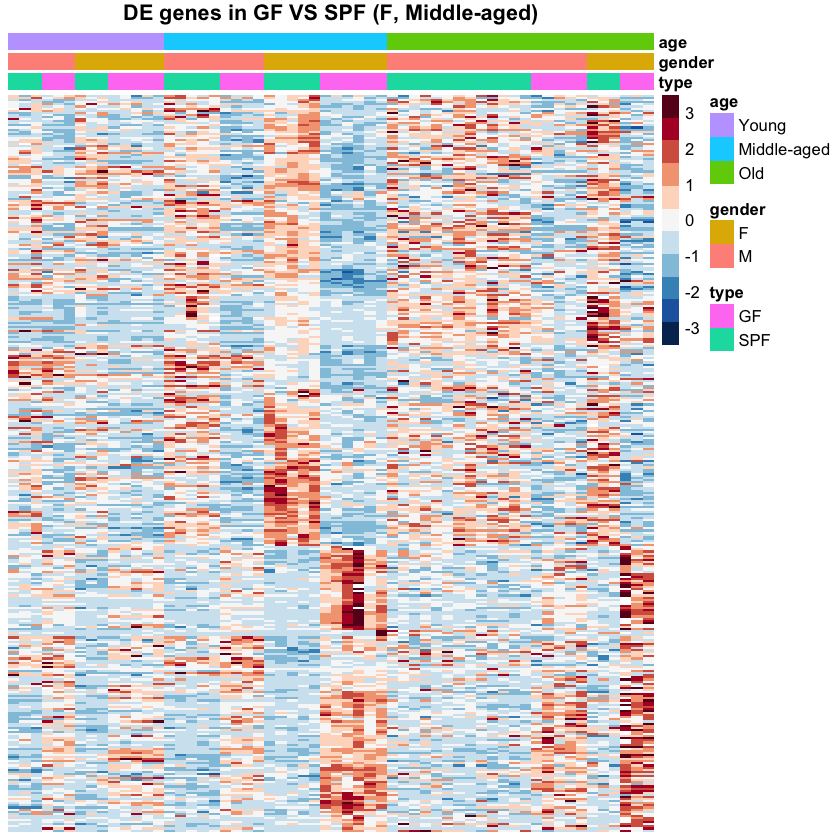

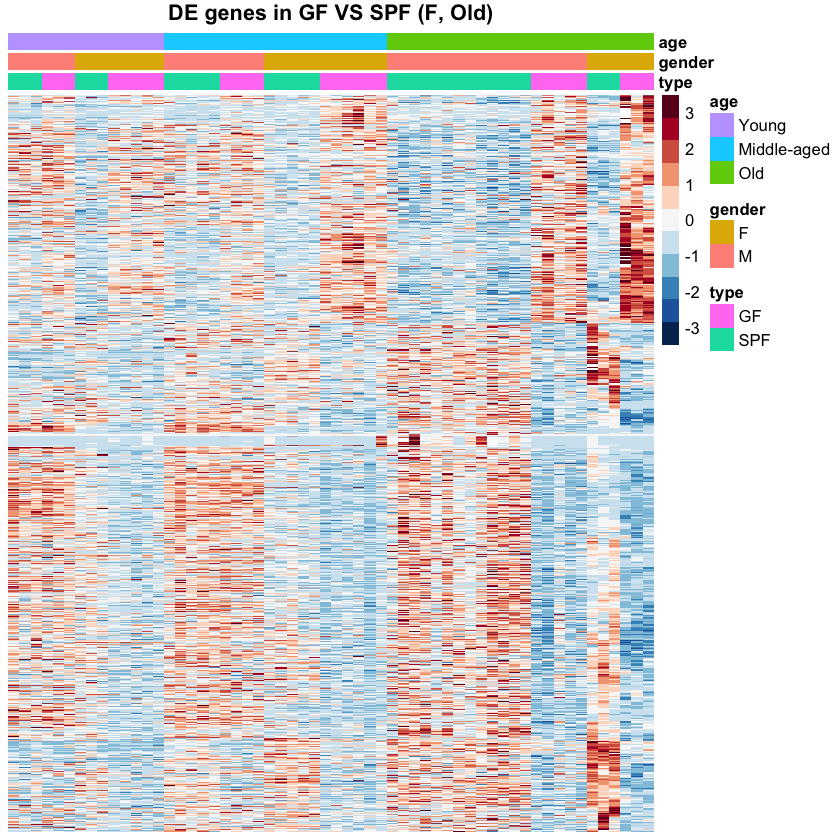

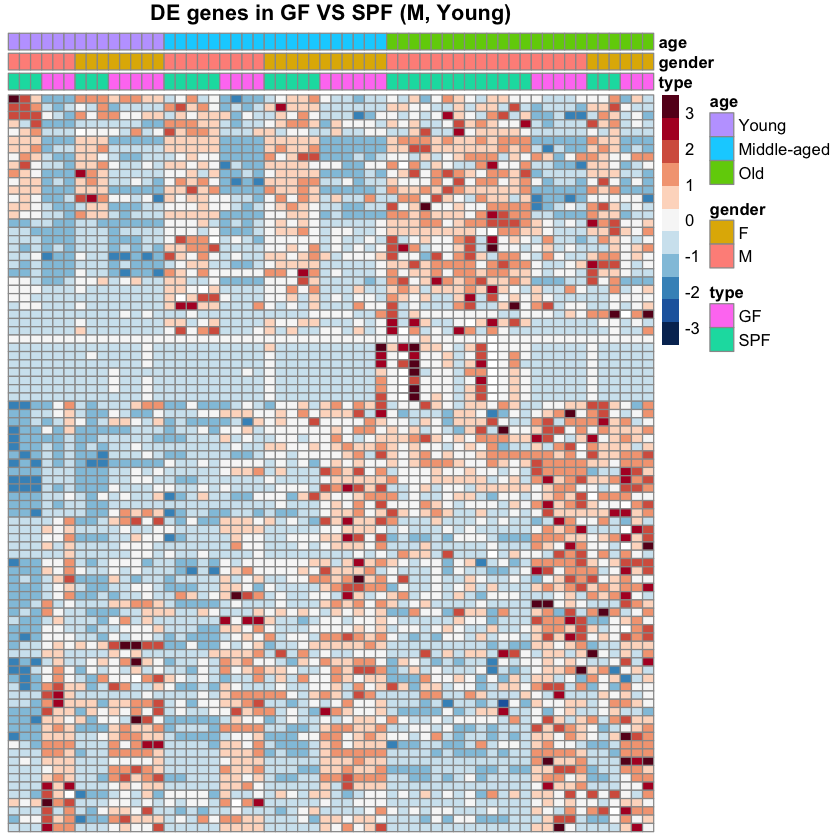

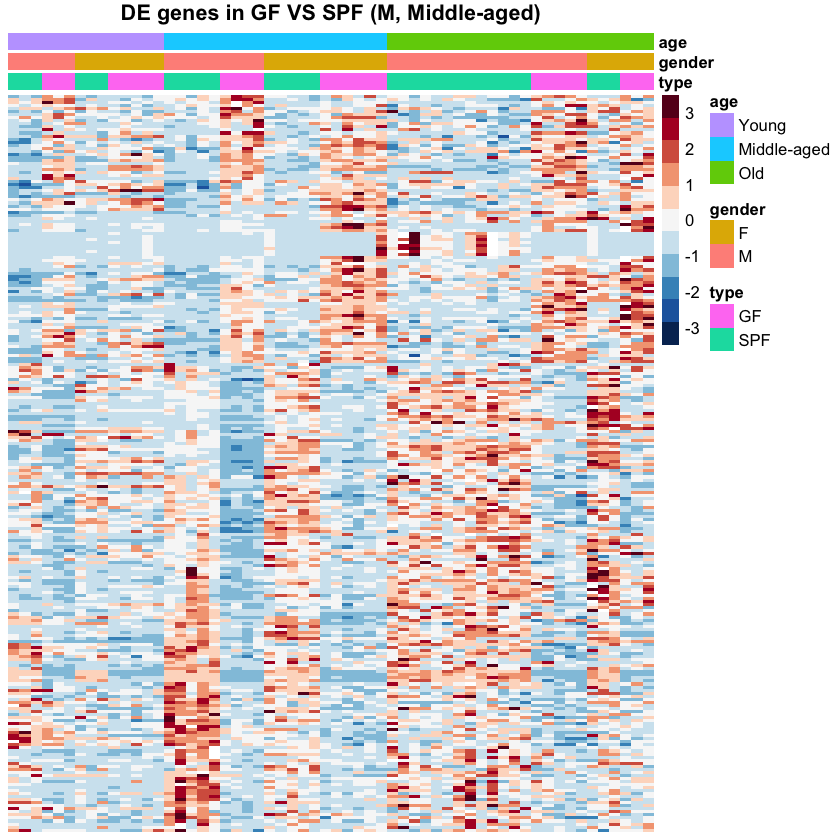

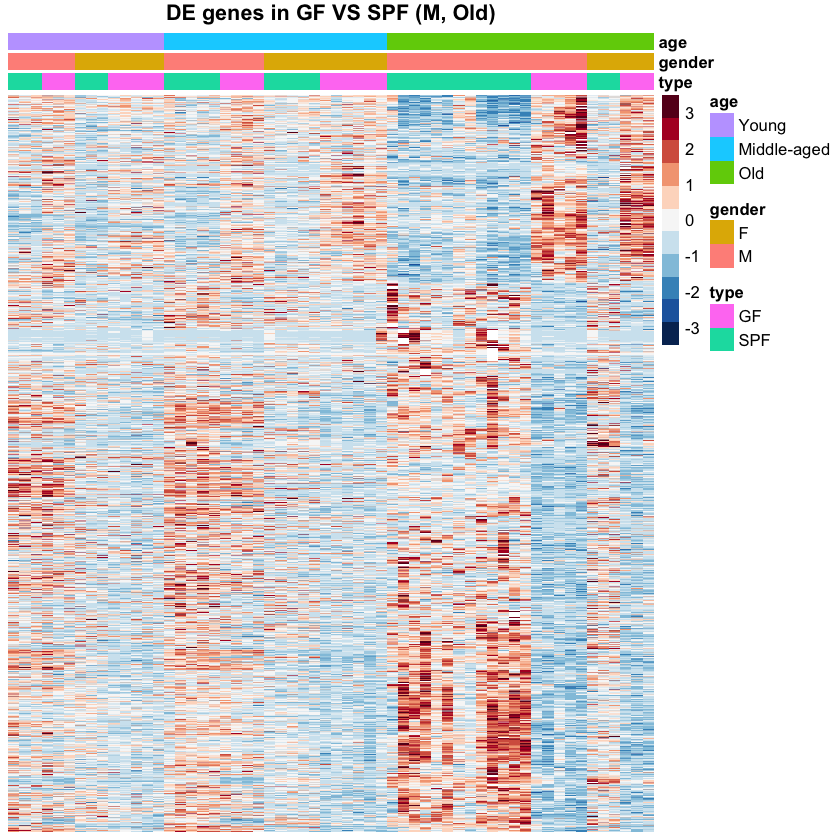

In [175]:
for(comp in names(comps)){
    plot_z_score_heatmap(z_scores,
        type_gender_age_deg$sign_fc_deg %>% filter(!is.na((!!as.name(comp)))) %>% pull(genes),
        col_order$agt,
        annot_col$agt,
        paste("DE genes in", comp),
        comps[[comp]])
}

# Co-expression (WGCNA)

## Z-score in modules

In [231]:
comps = c("GF VS SPF (F, Young)", "GF VS SPF (F, Middle-aged)", "GF VS SPF (F, Old)",
          "GF VS SPF (M, Young)", "GF VS SPF (M, Middle-aged)", "GF VS SPF (M, Old)")

### Column order: gender - age - type

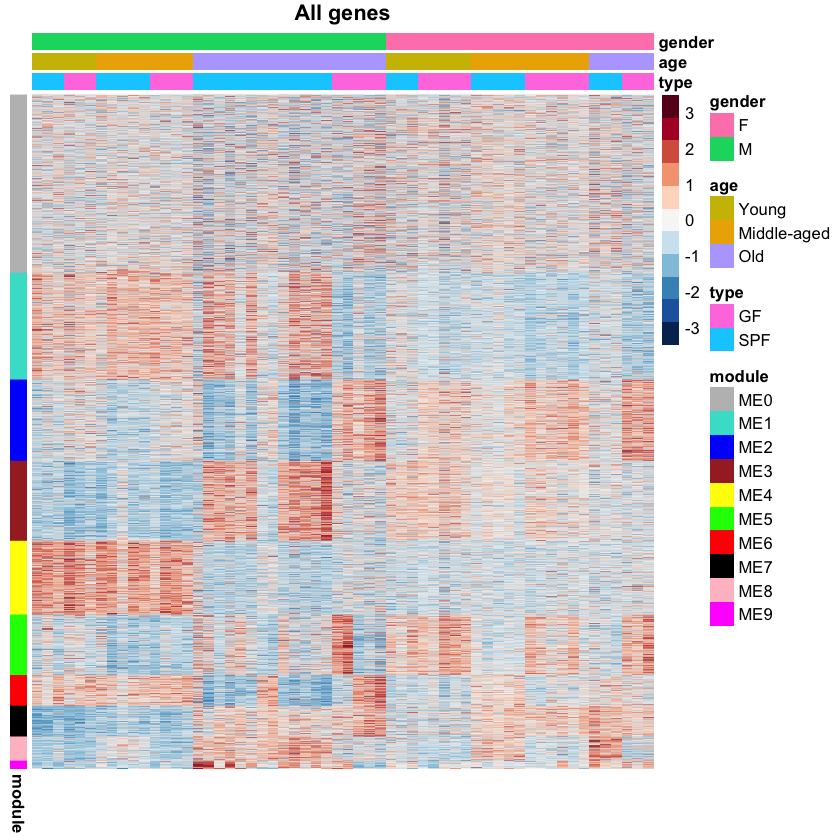

In [228]:
plot_z_score_heatmap_with_modules(z_scores,
                                  rownames(z_scores),
                                  col_order$gat,
                                  annot_col$gat,
                                  genes_in_modules,
                                  "All genes")

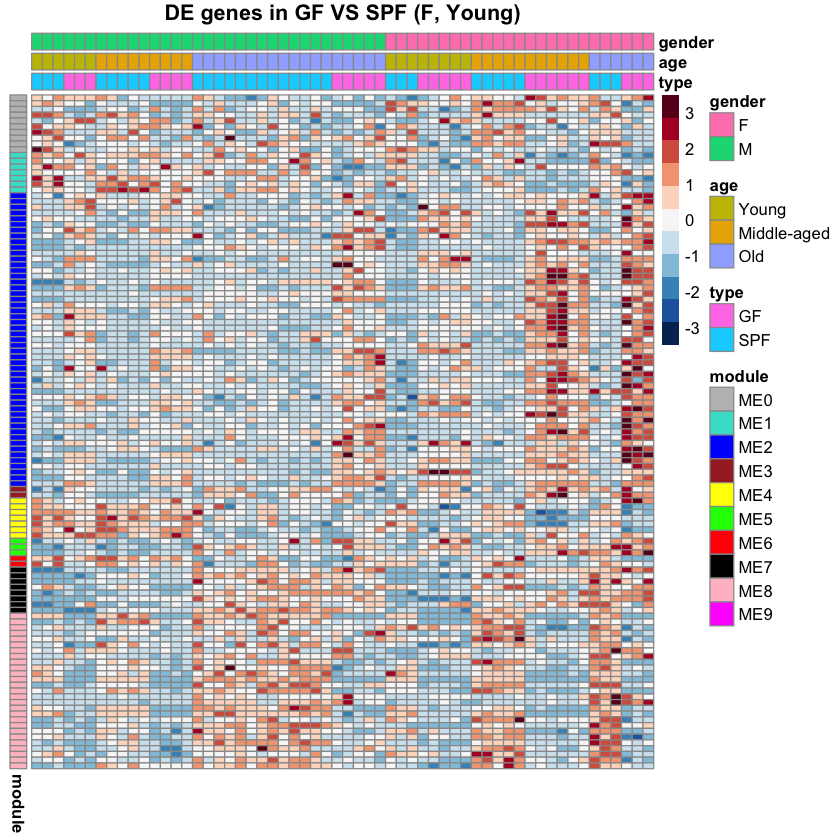

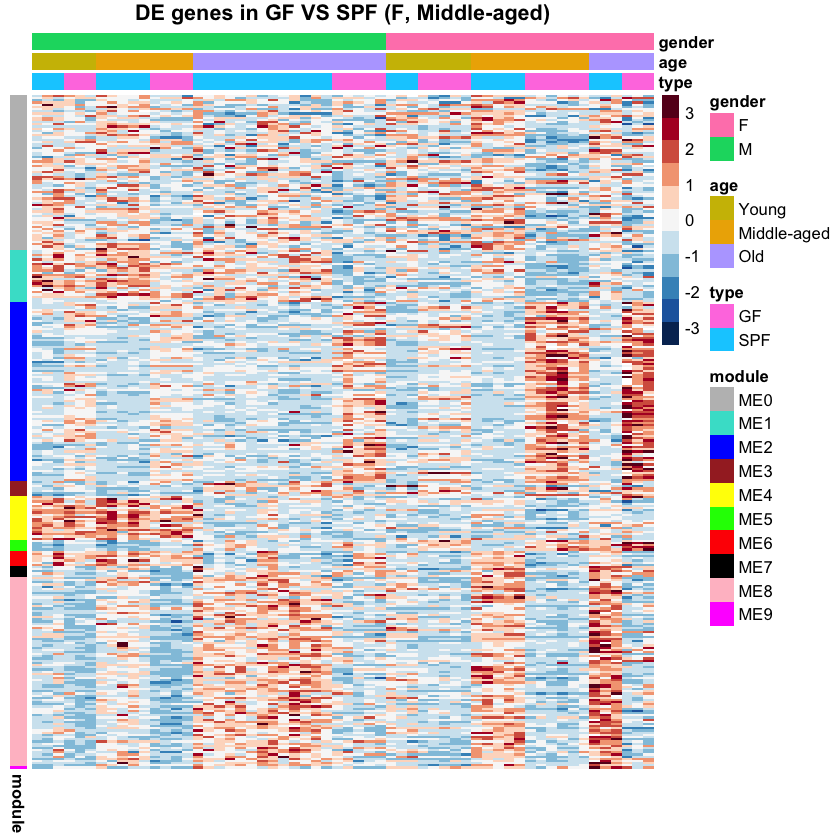

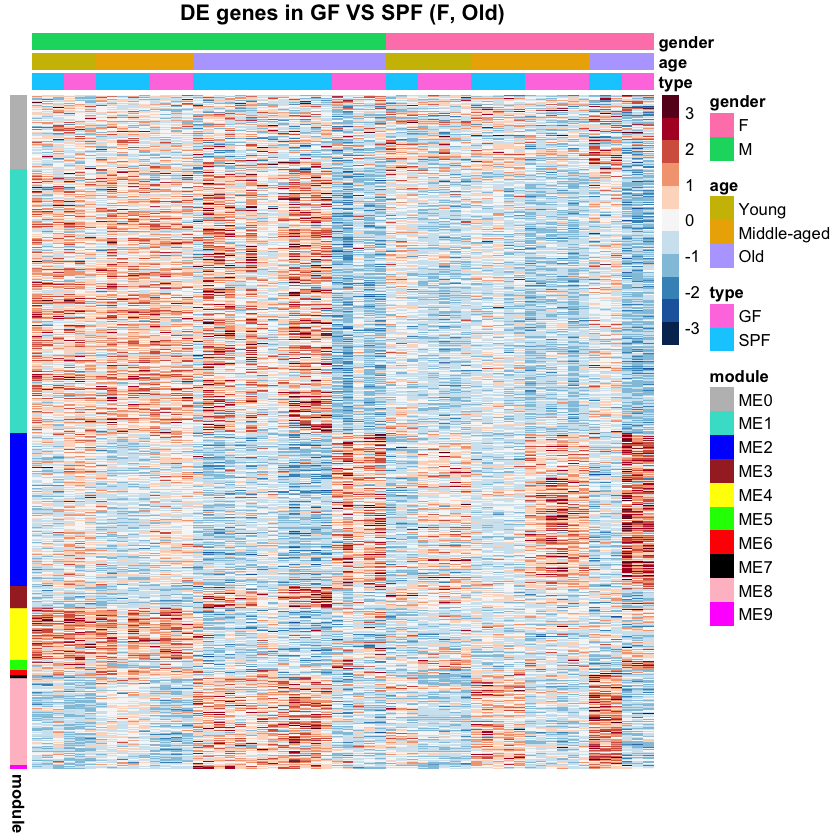

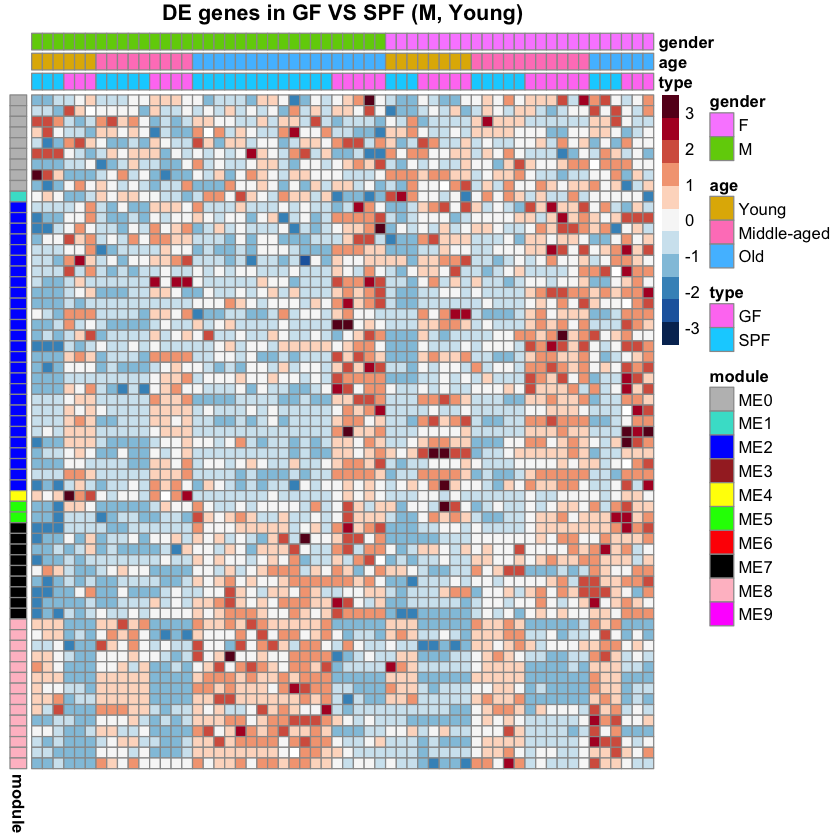

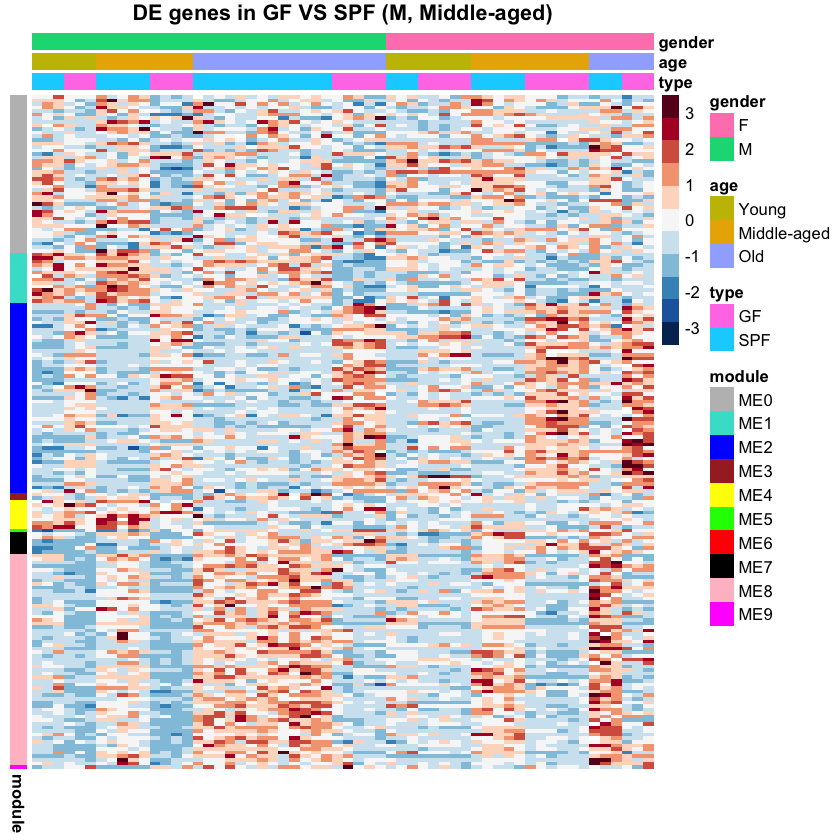

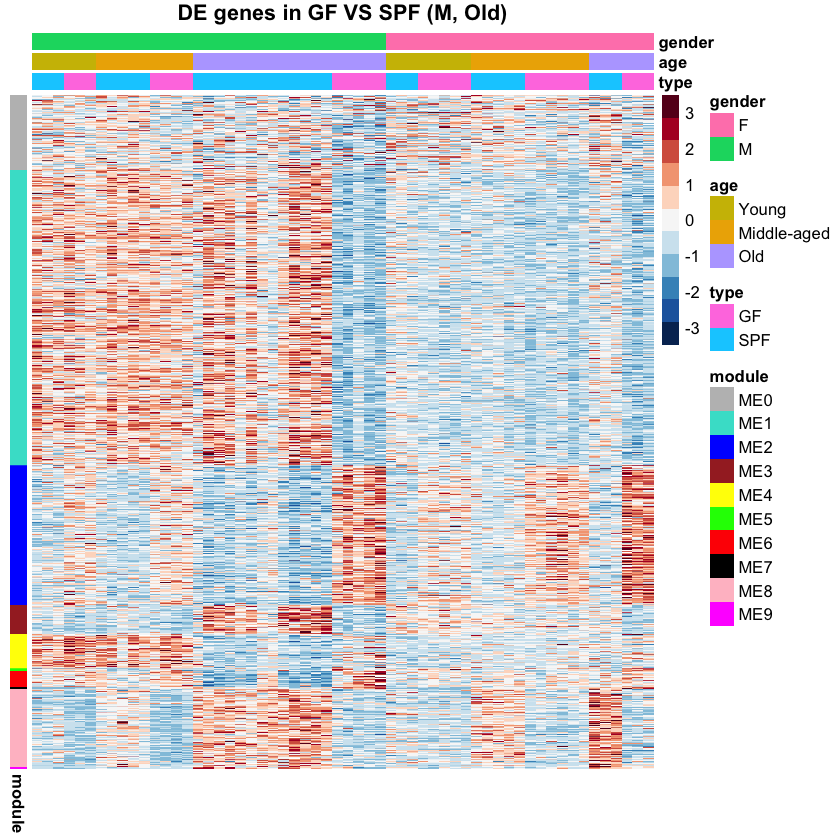

In [234]:
for(comp in comps){
    plot_z_score_heatmap_with_modules(z_scores,
        type_gender_age_deg$sign_fc_deg %>% filter(!is.na((!!as.name(comp)))) %>% pull(genes),
        col_order$gat,
        annot_col$gat,
        genes_in_modules,
        paste("DE genes in", comp))
}

### Column order: age - gender - type

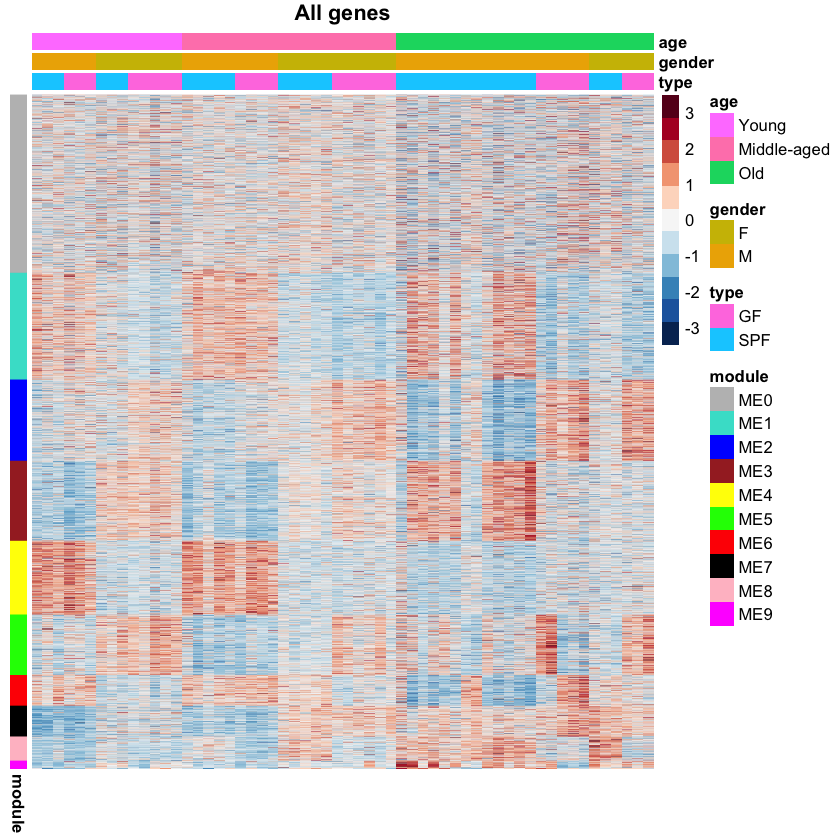

In [236]:
plot_z_score_heatmap_with_modules(z_scores,
    rownames(z_scores),
    col_order$agt,
    annot_col$agt,
    genes_in_modules,
    "All genes")

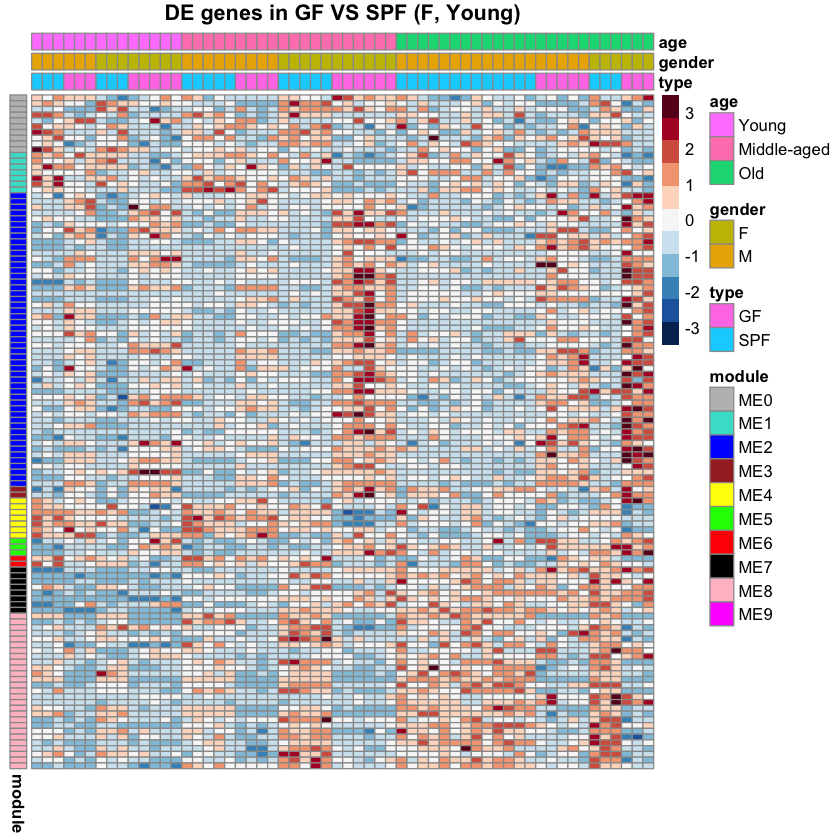

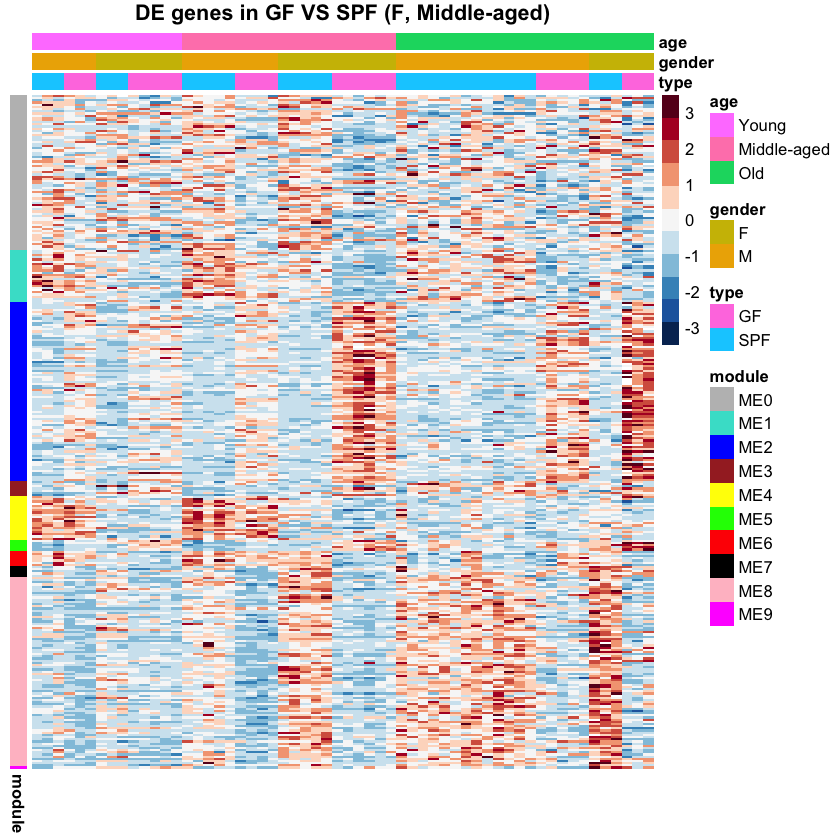

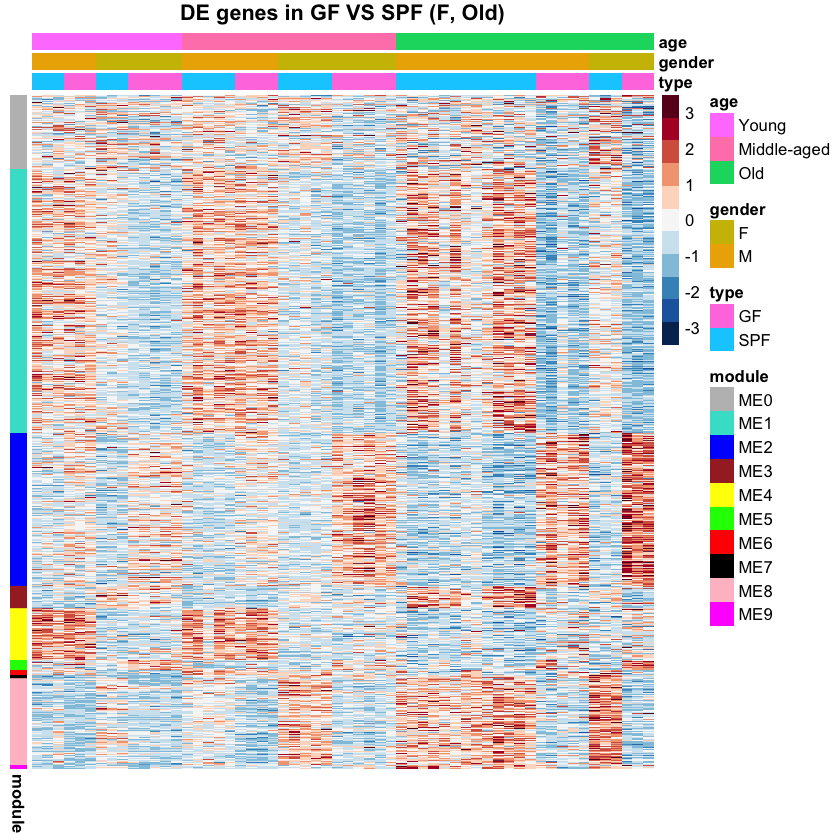

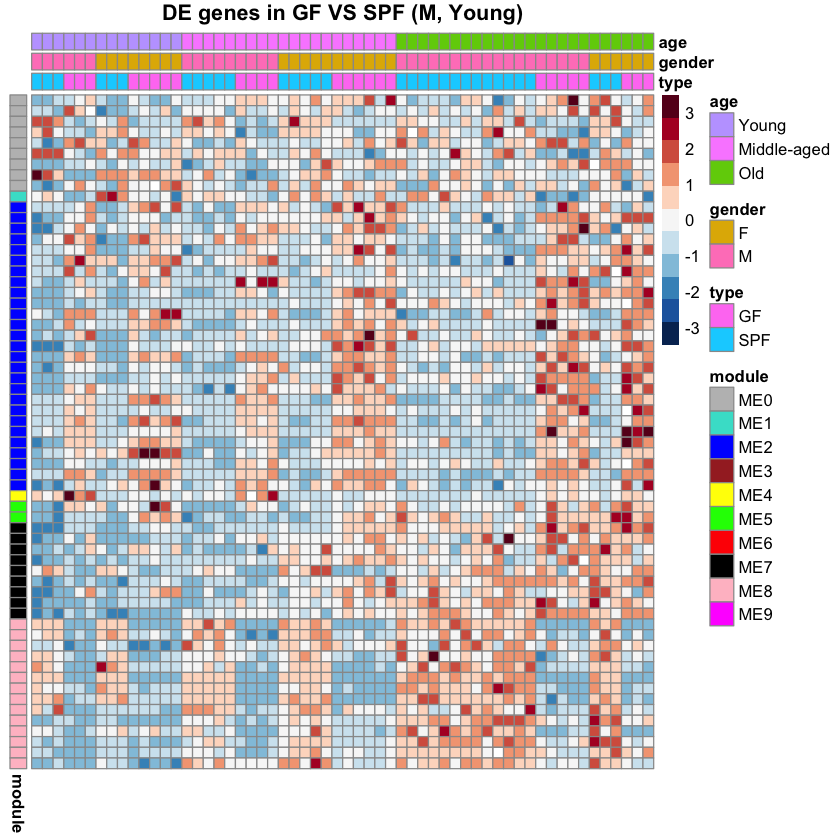

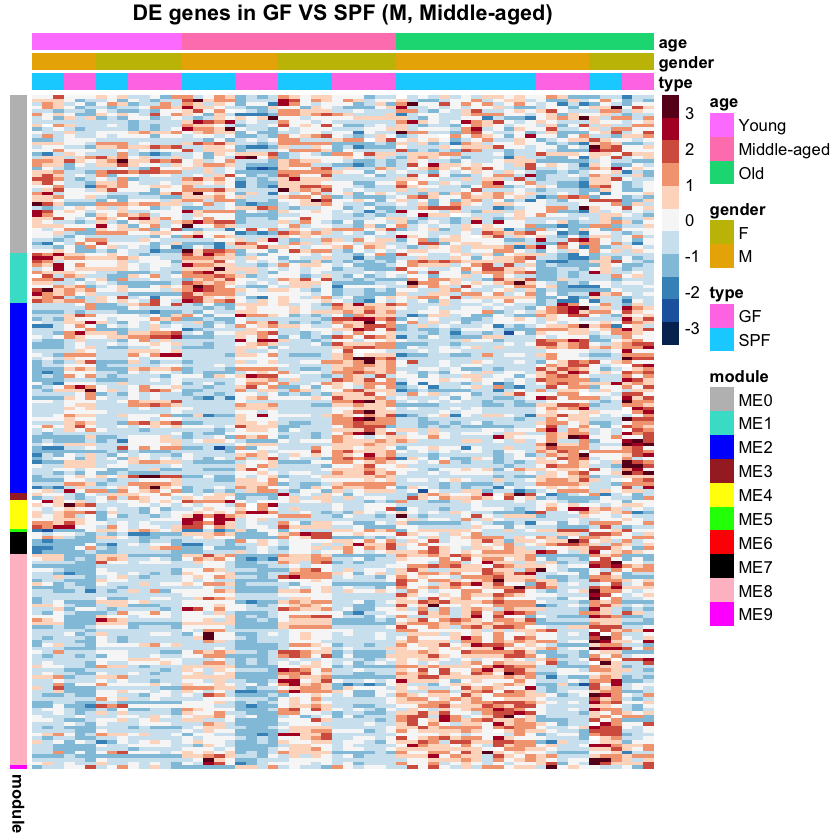

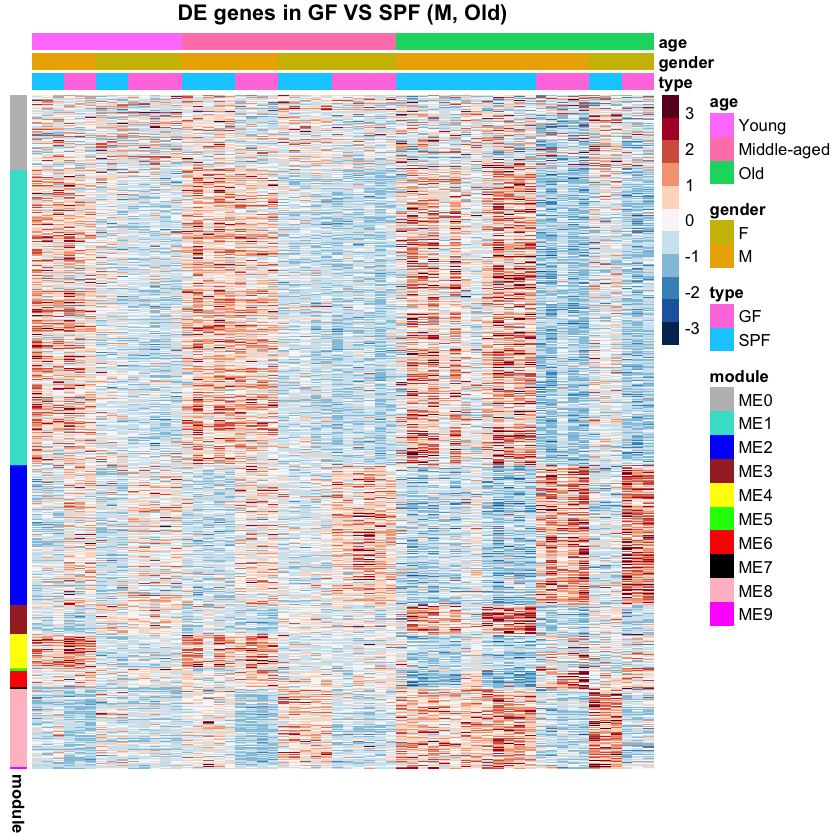

In [237]:
for(comp in comps){
    plot_z_score_heatmap_with_modules(z_scores,
        type_gender_age_deg$sign_fc_deg %>% filter(!is.na((!!as.name(comp)))) %>% pull(genes),
        col_order$agt,
        annot_col$agt,
        genes_in_modules,
        paste("DE genes in", comp))
}

## Genes in modules

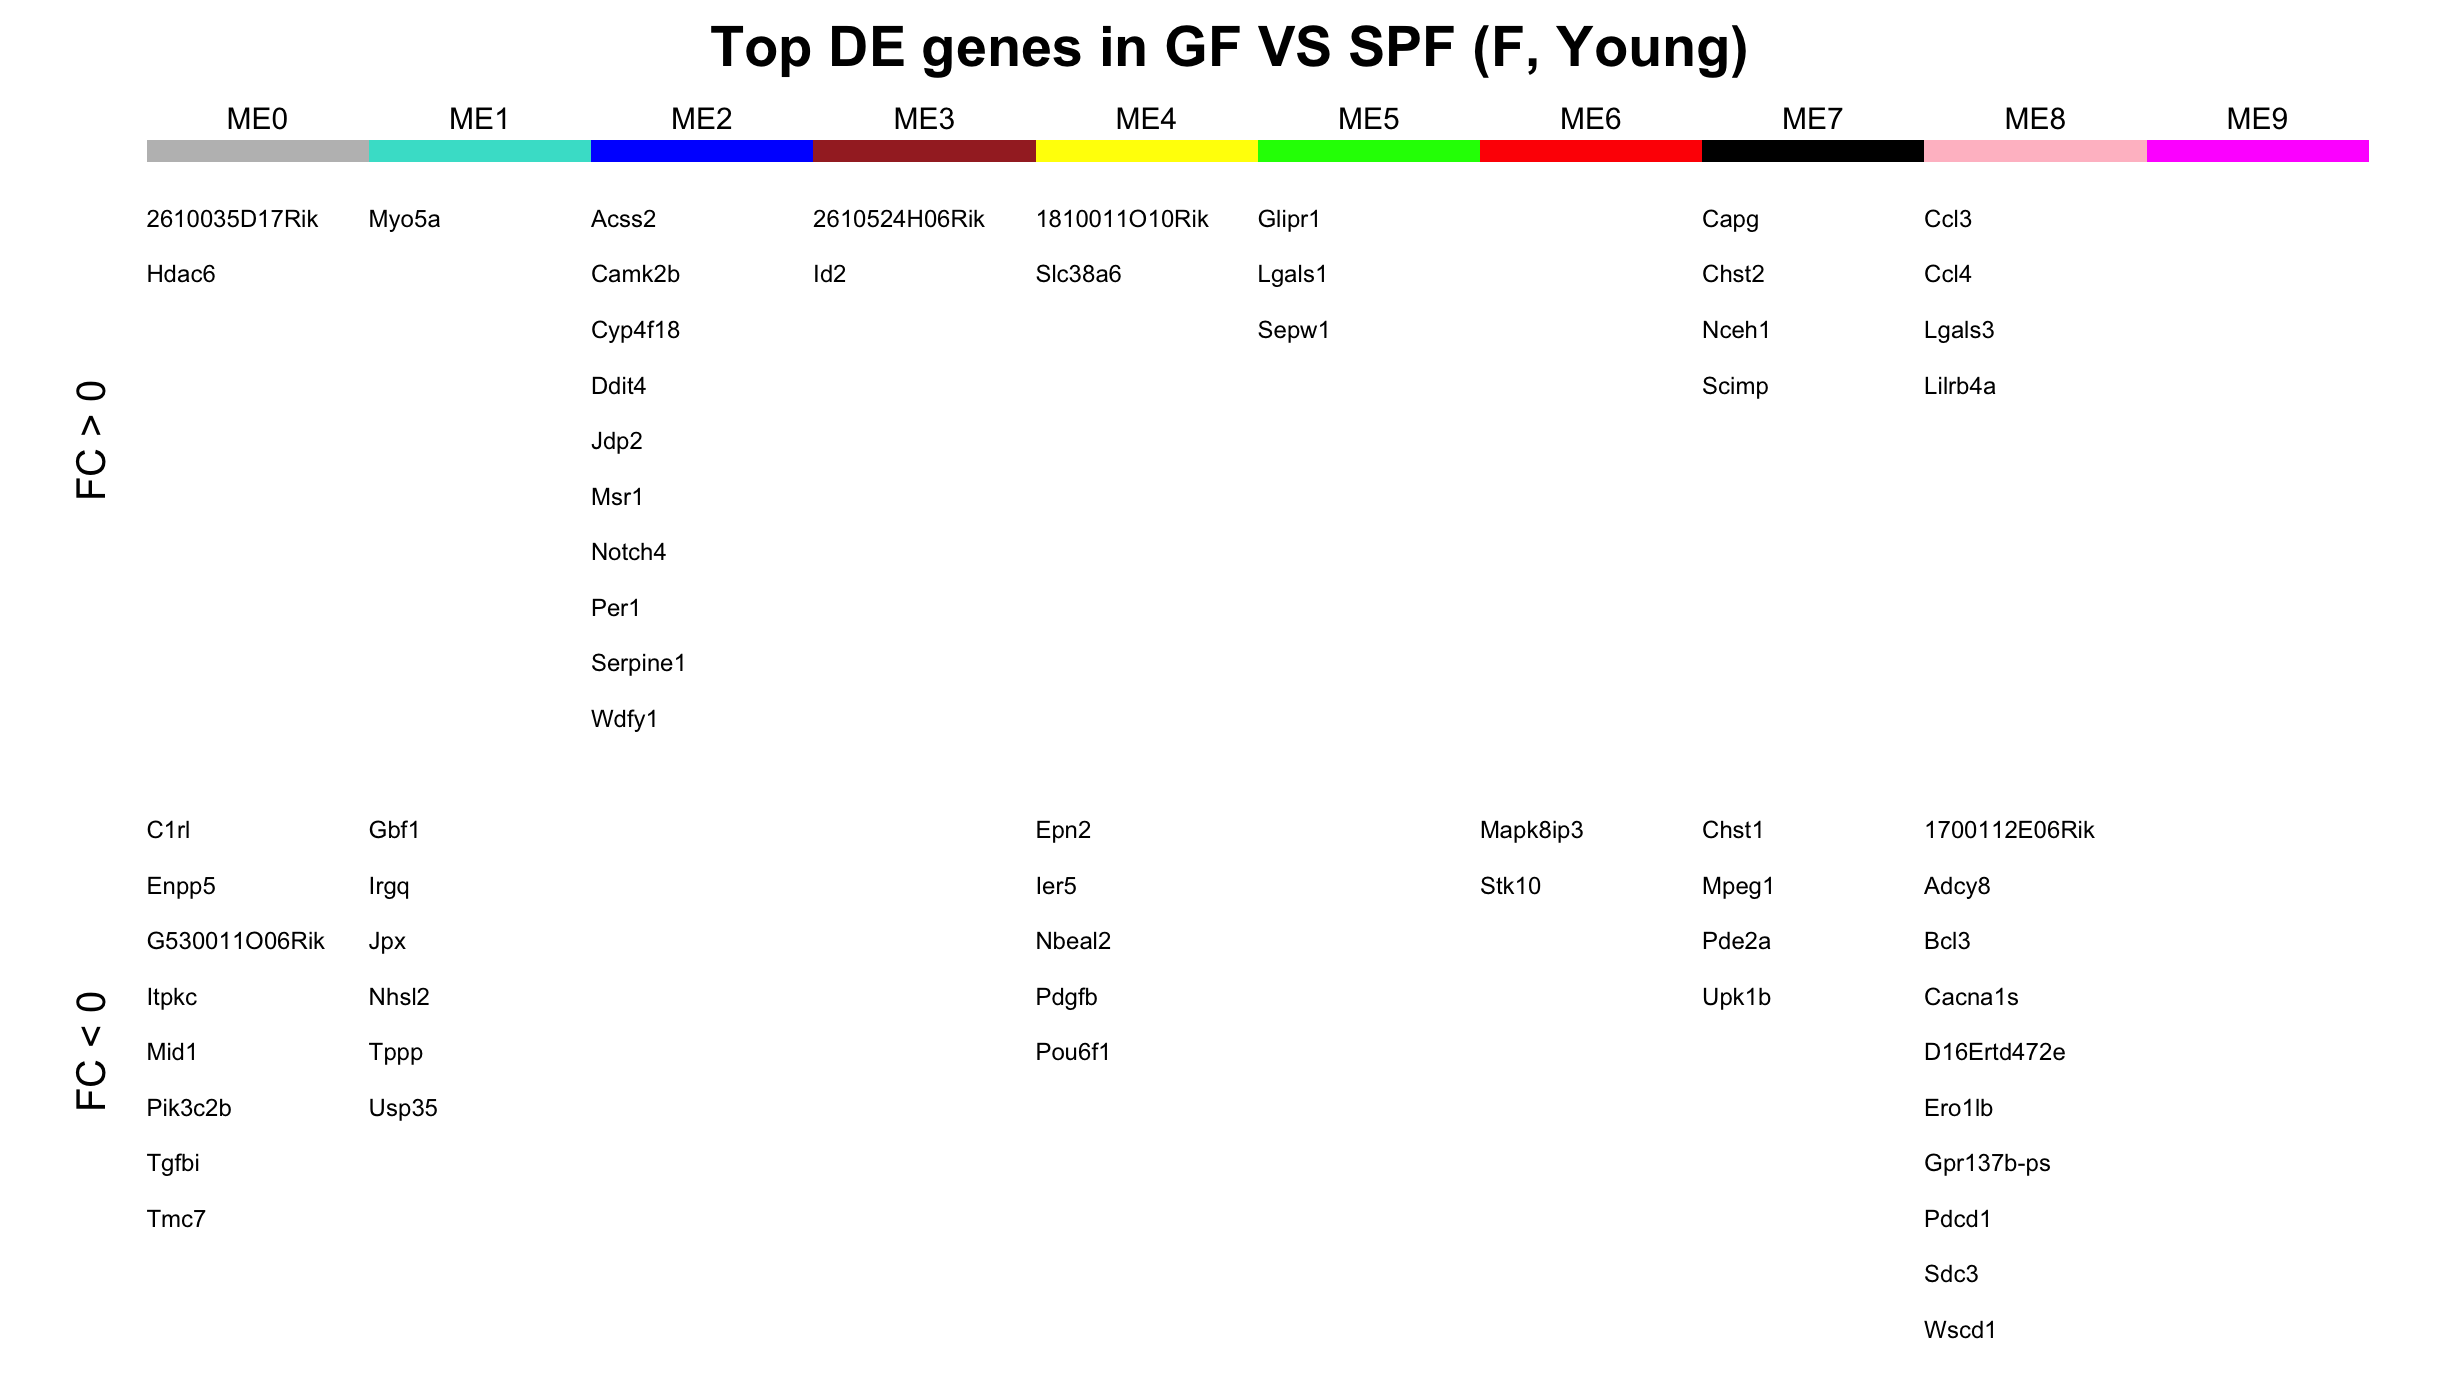

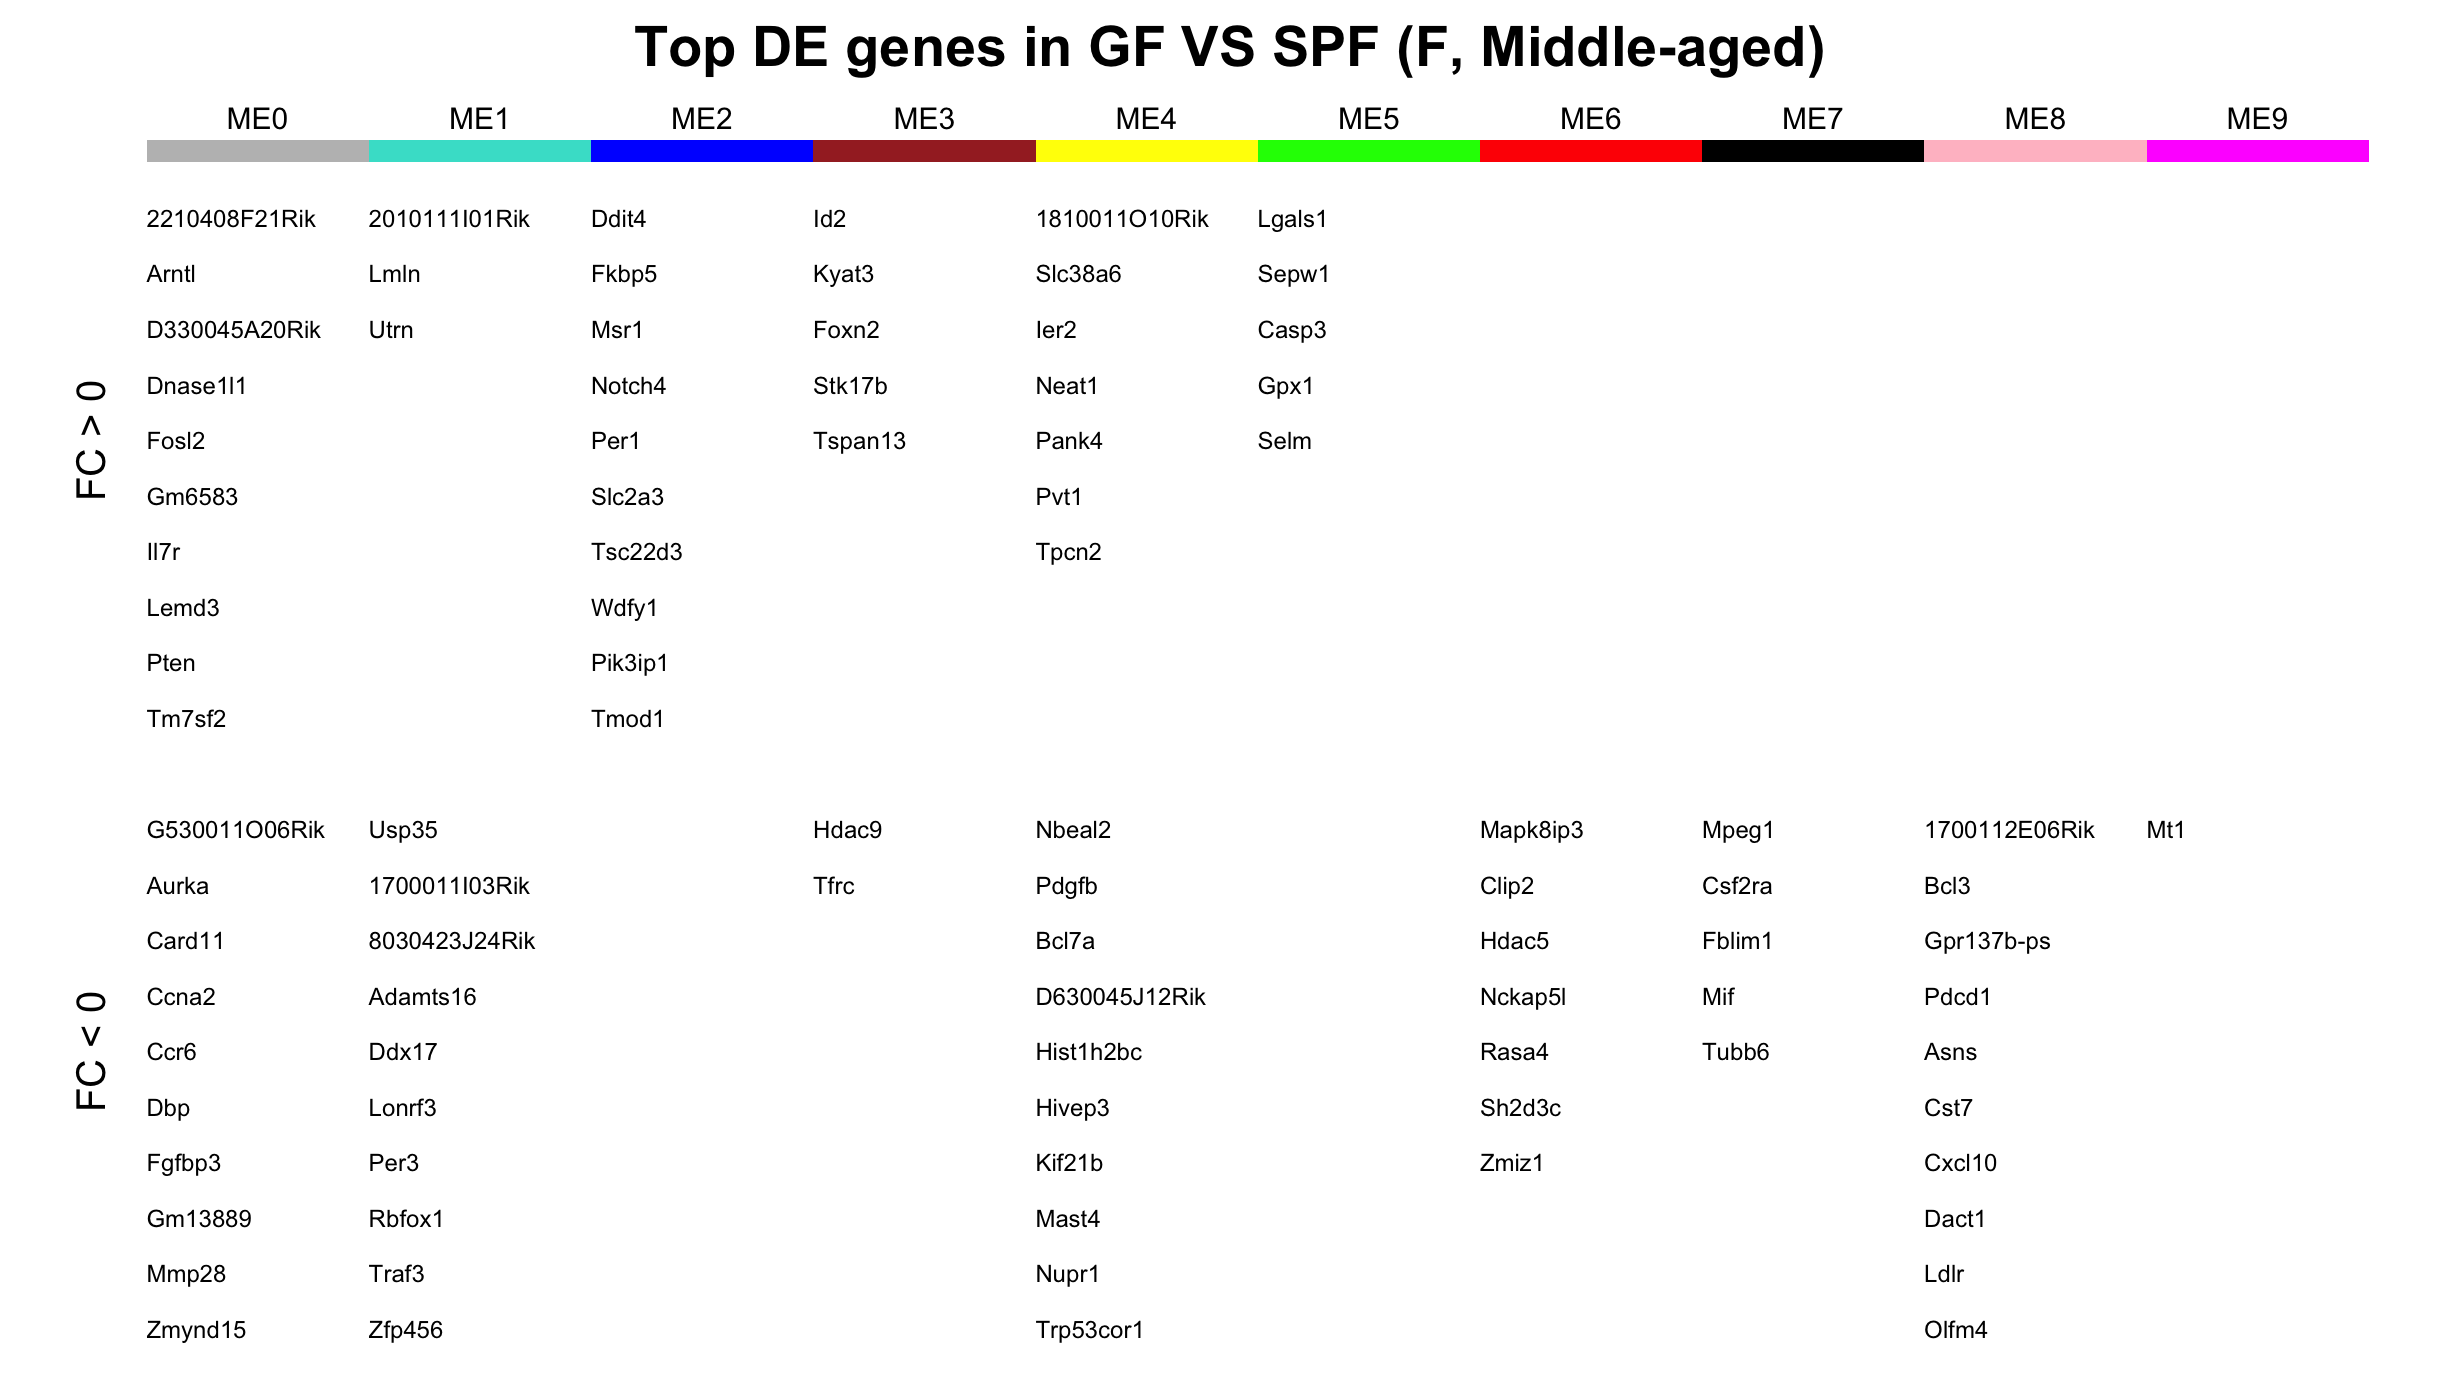

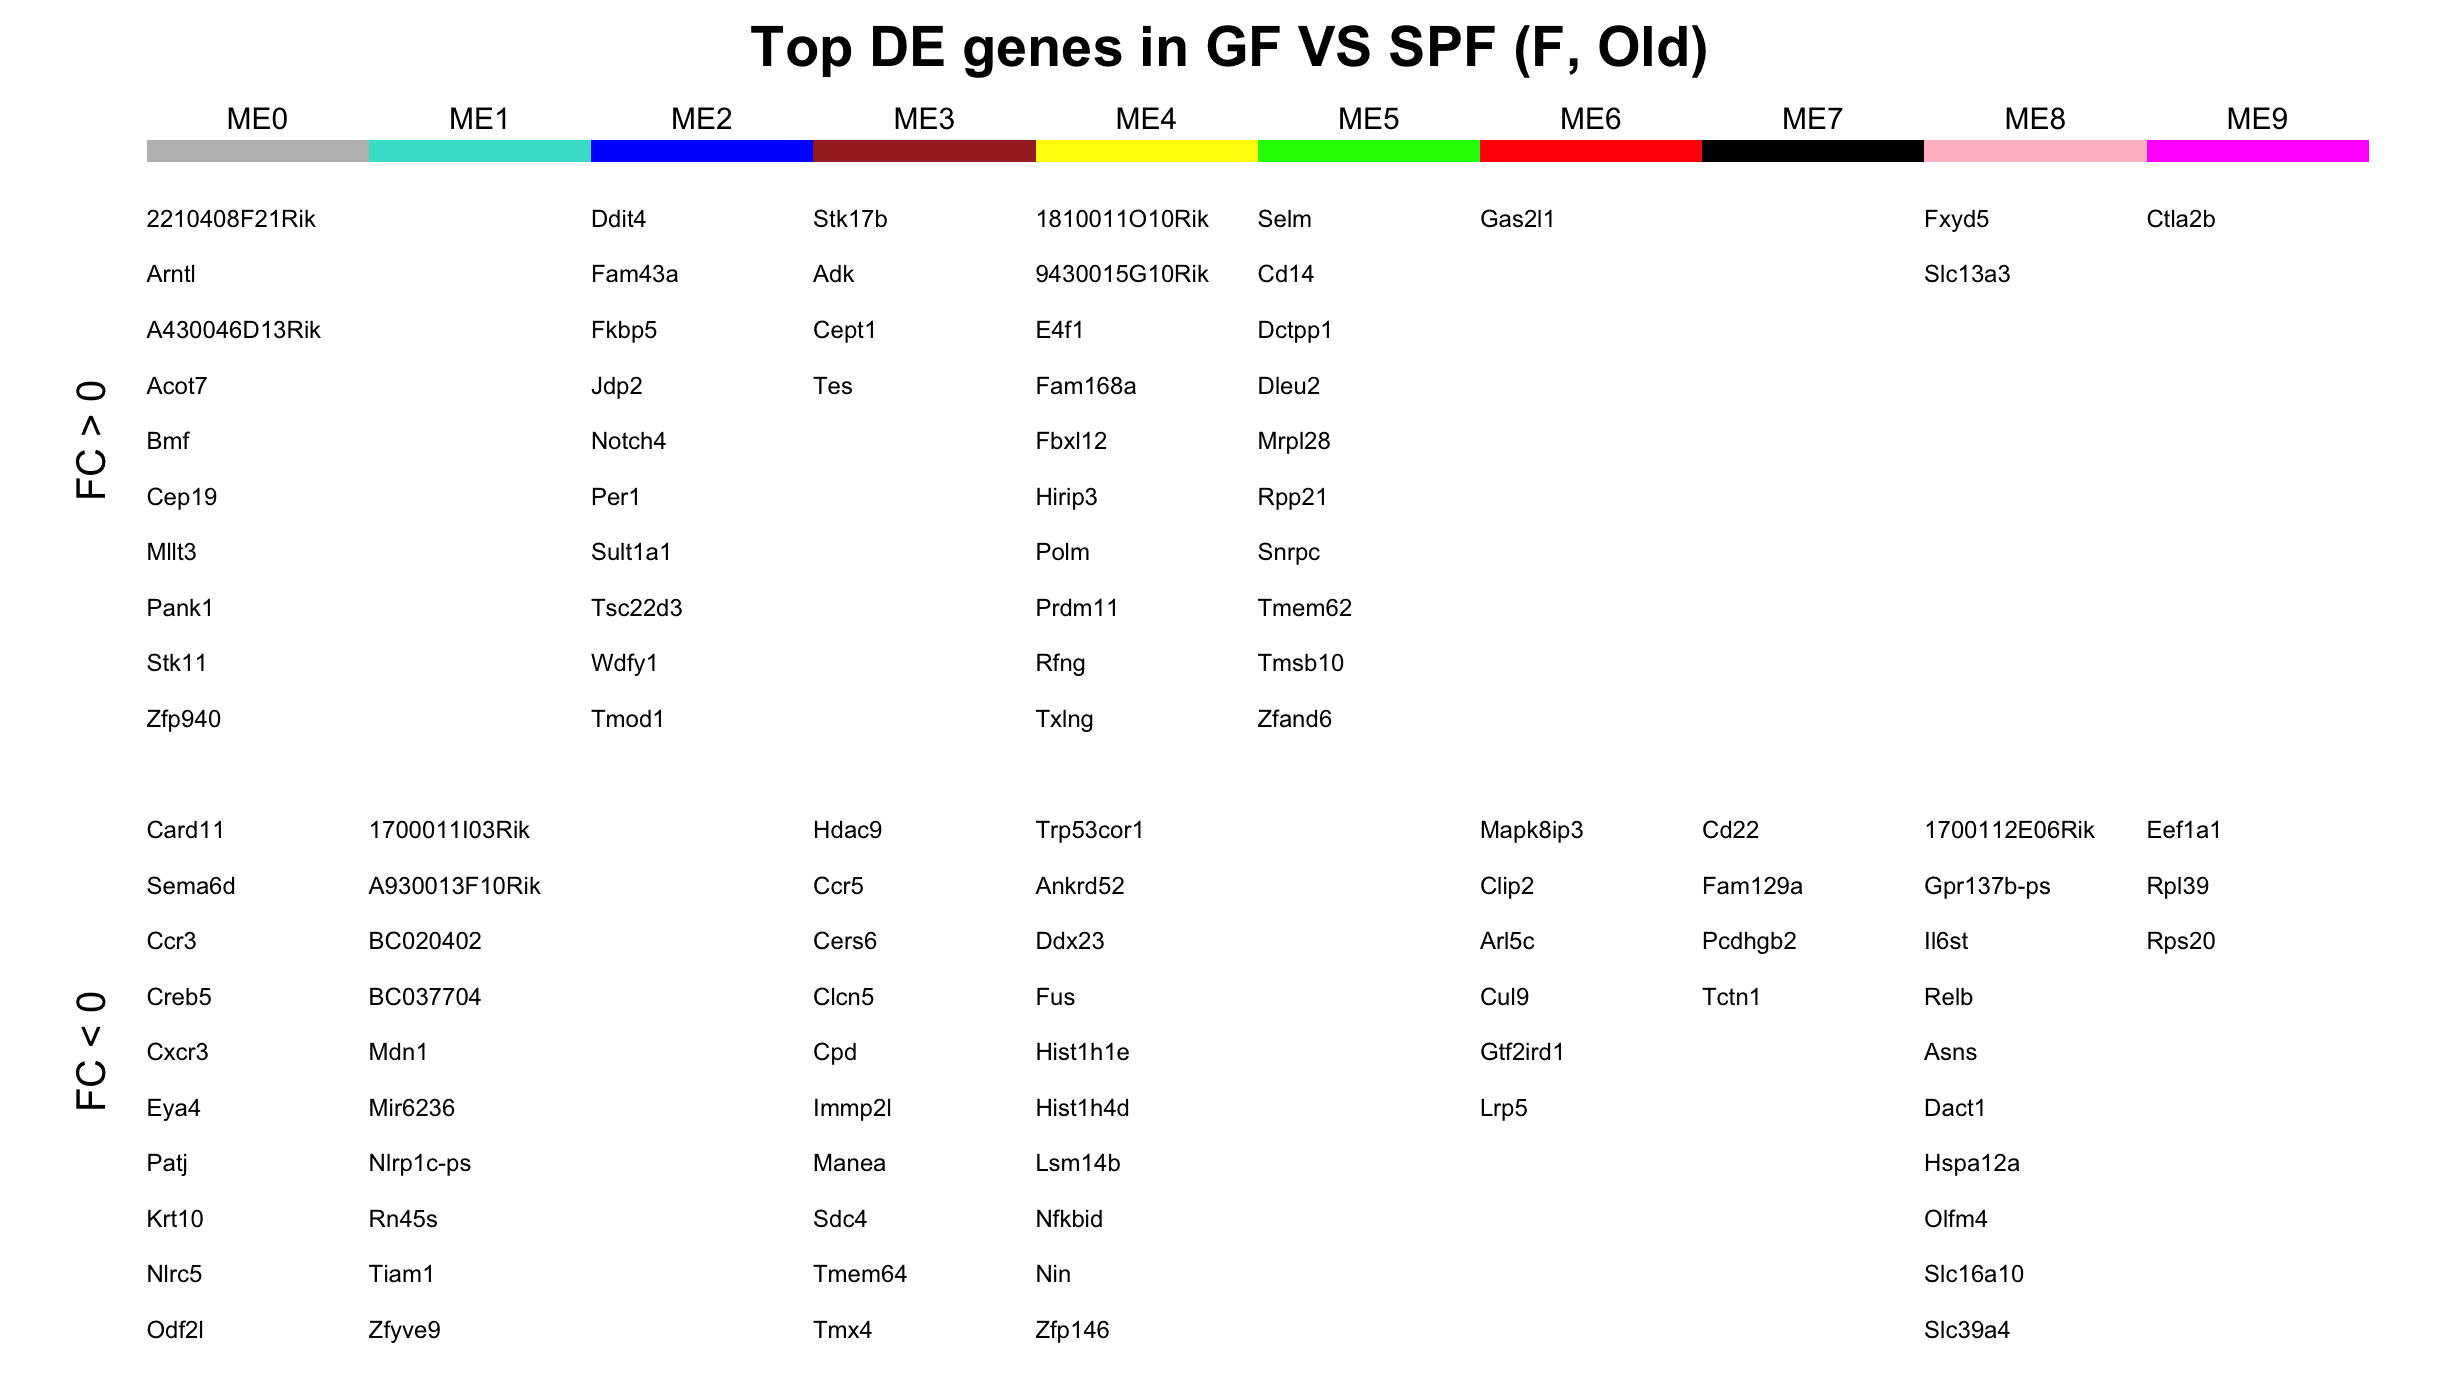

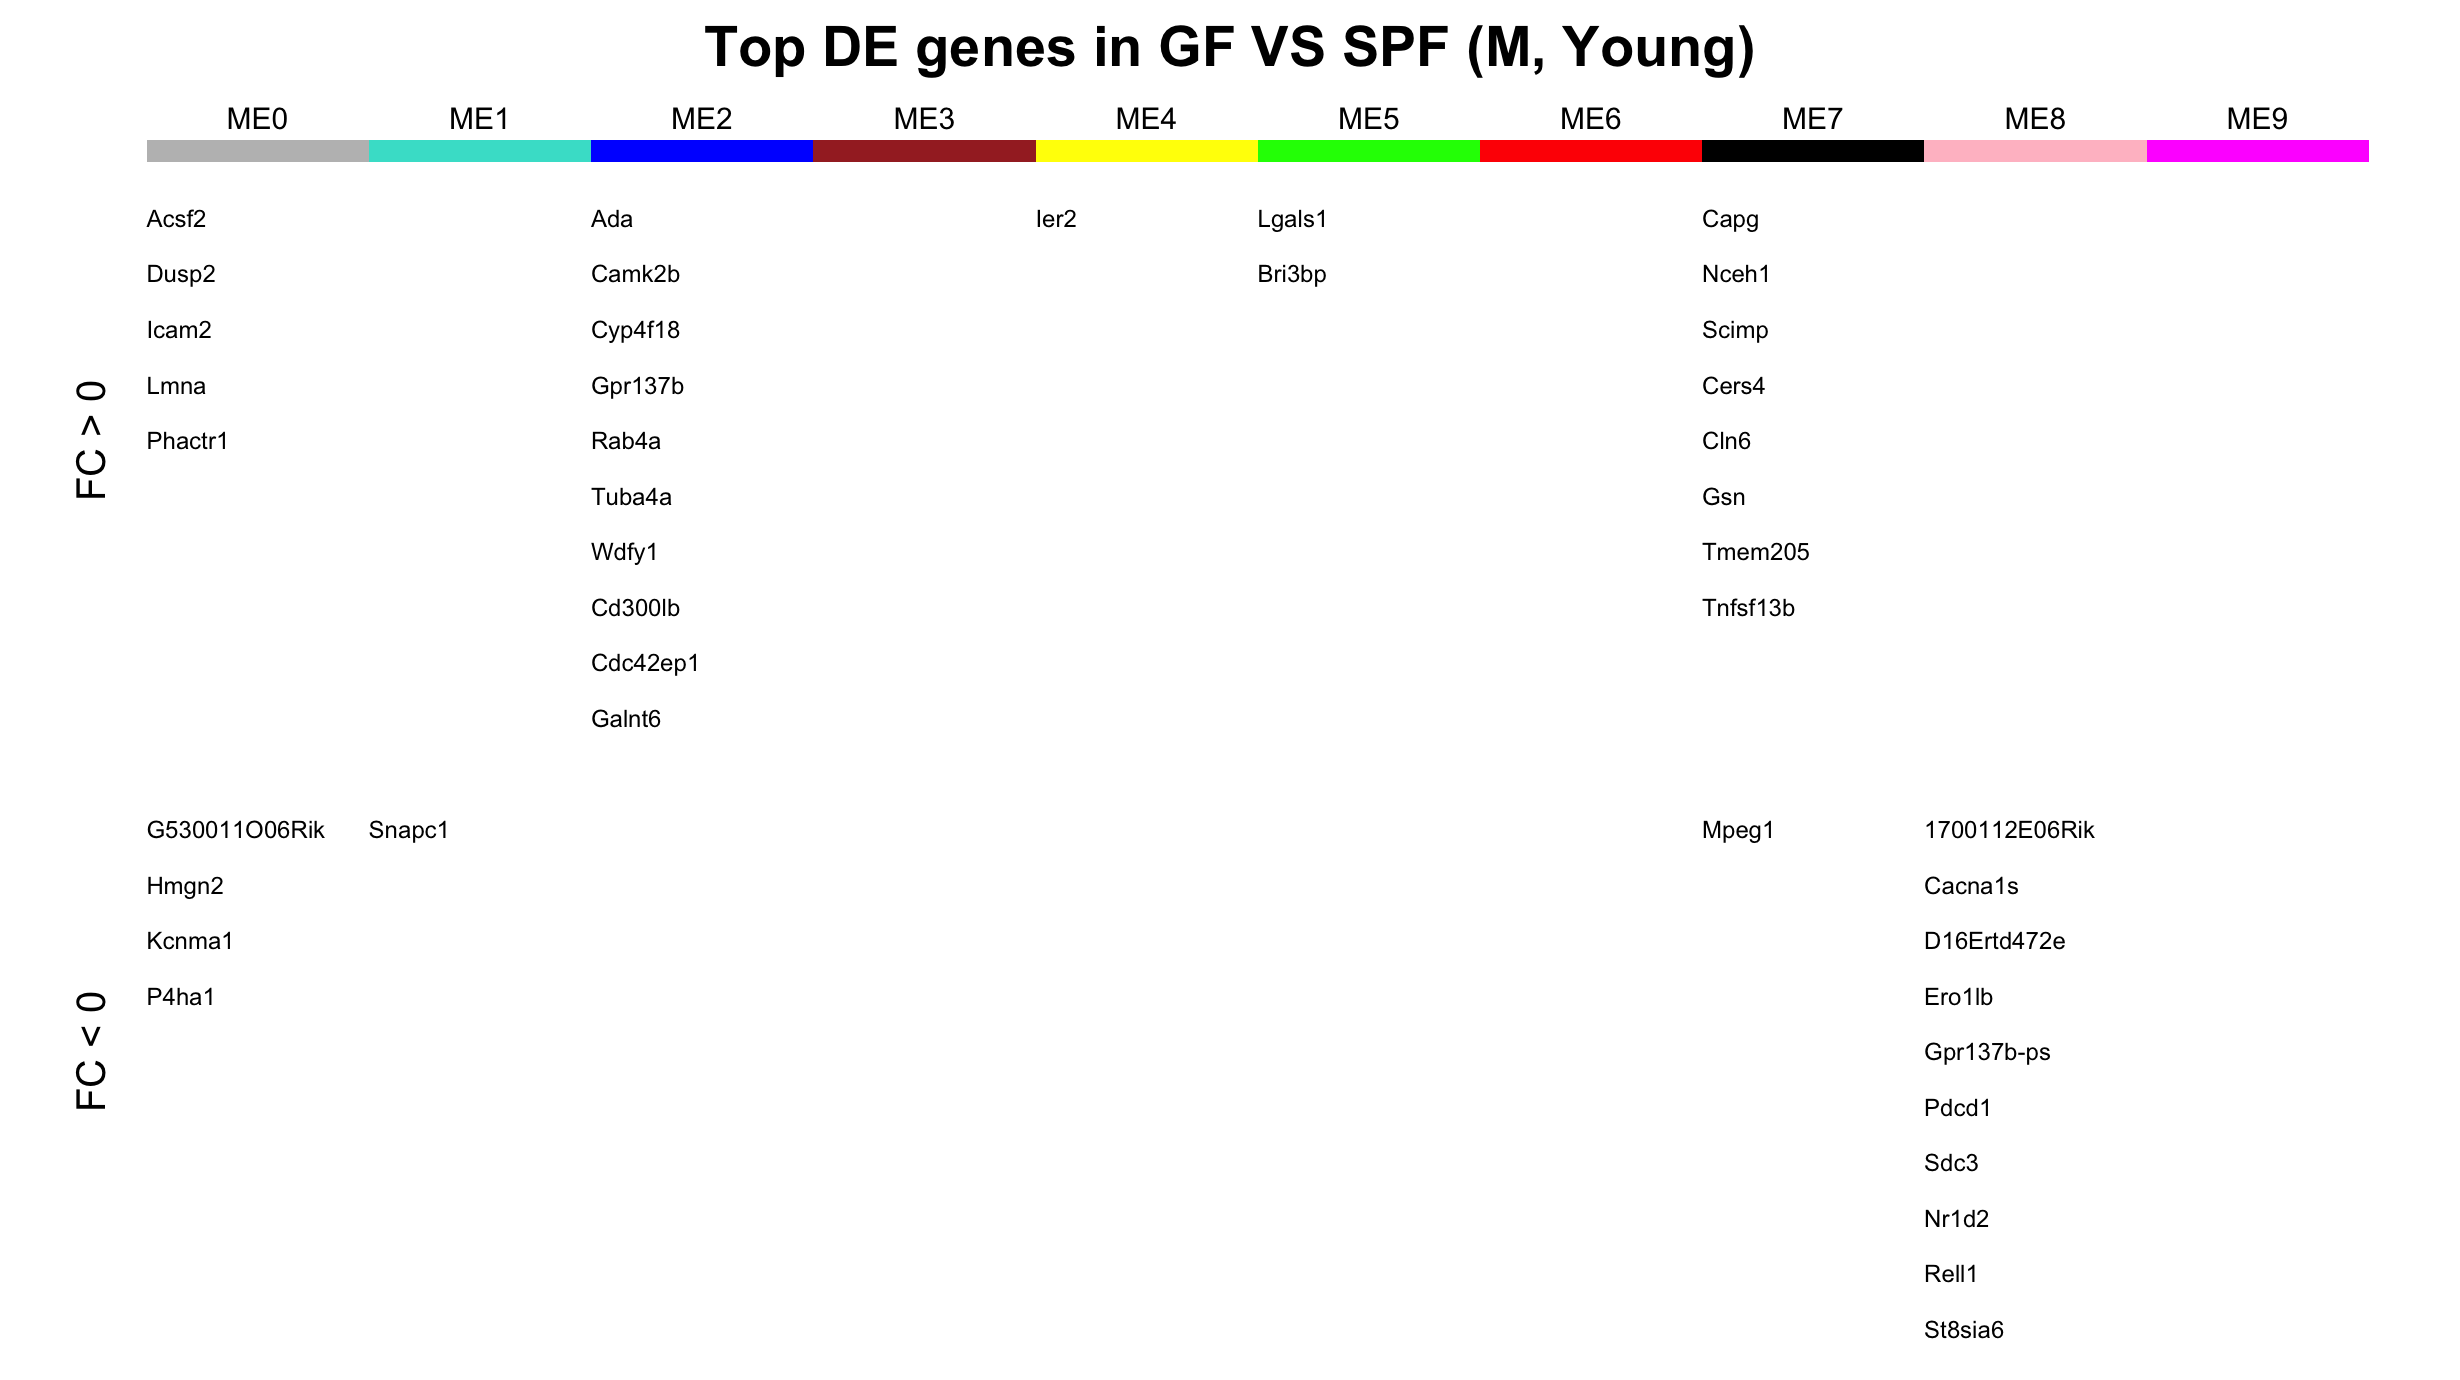

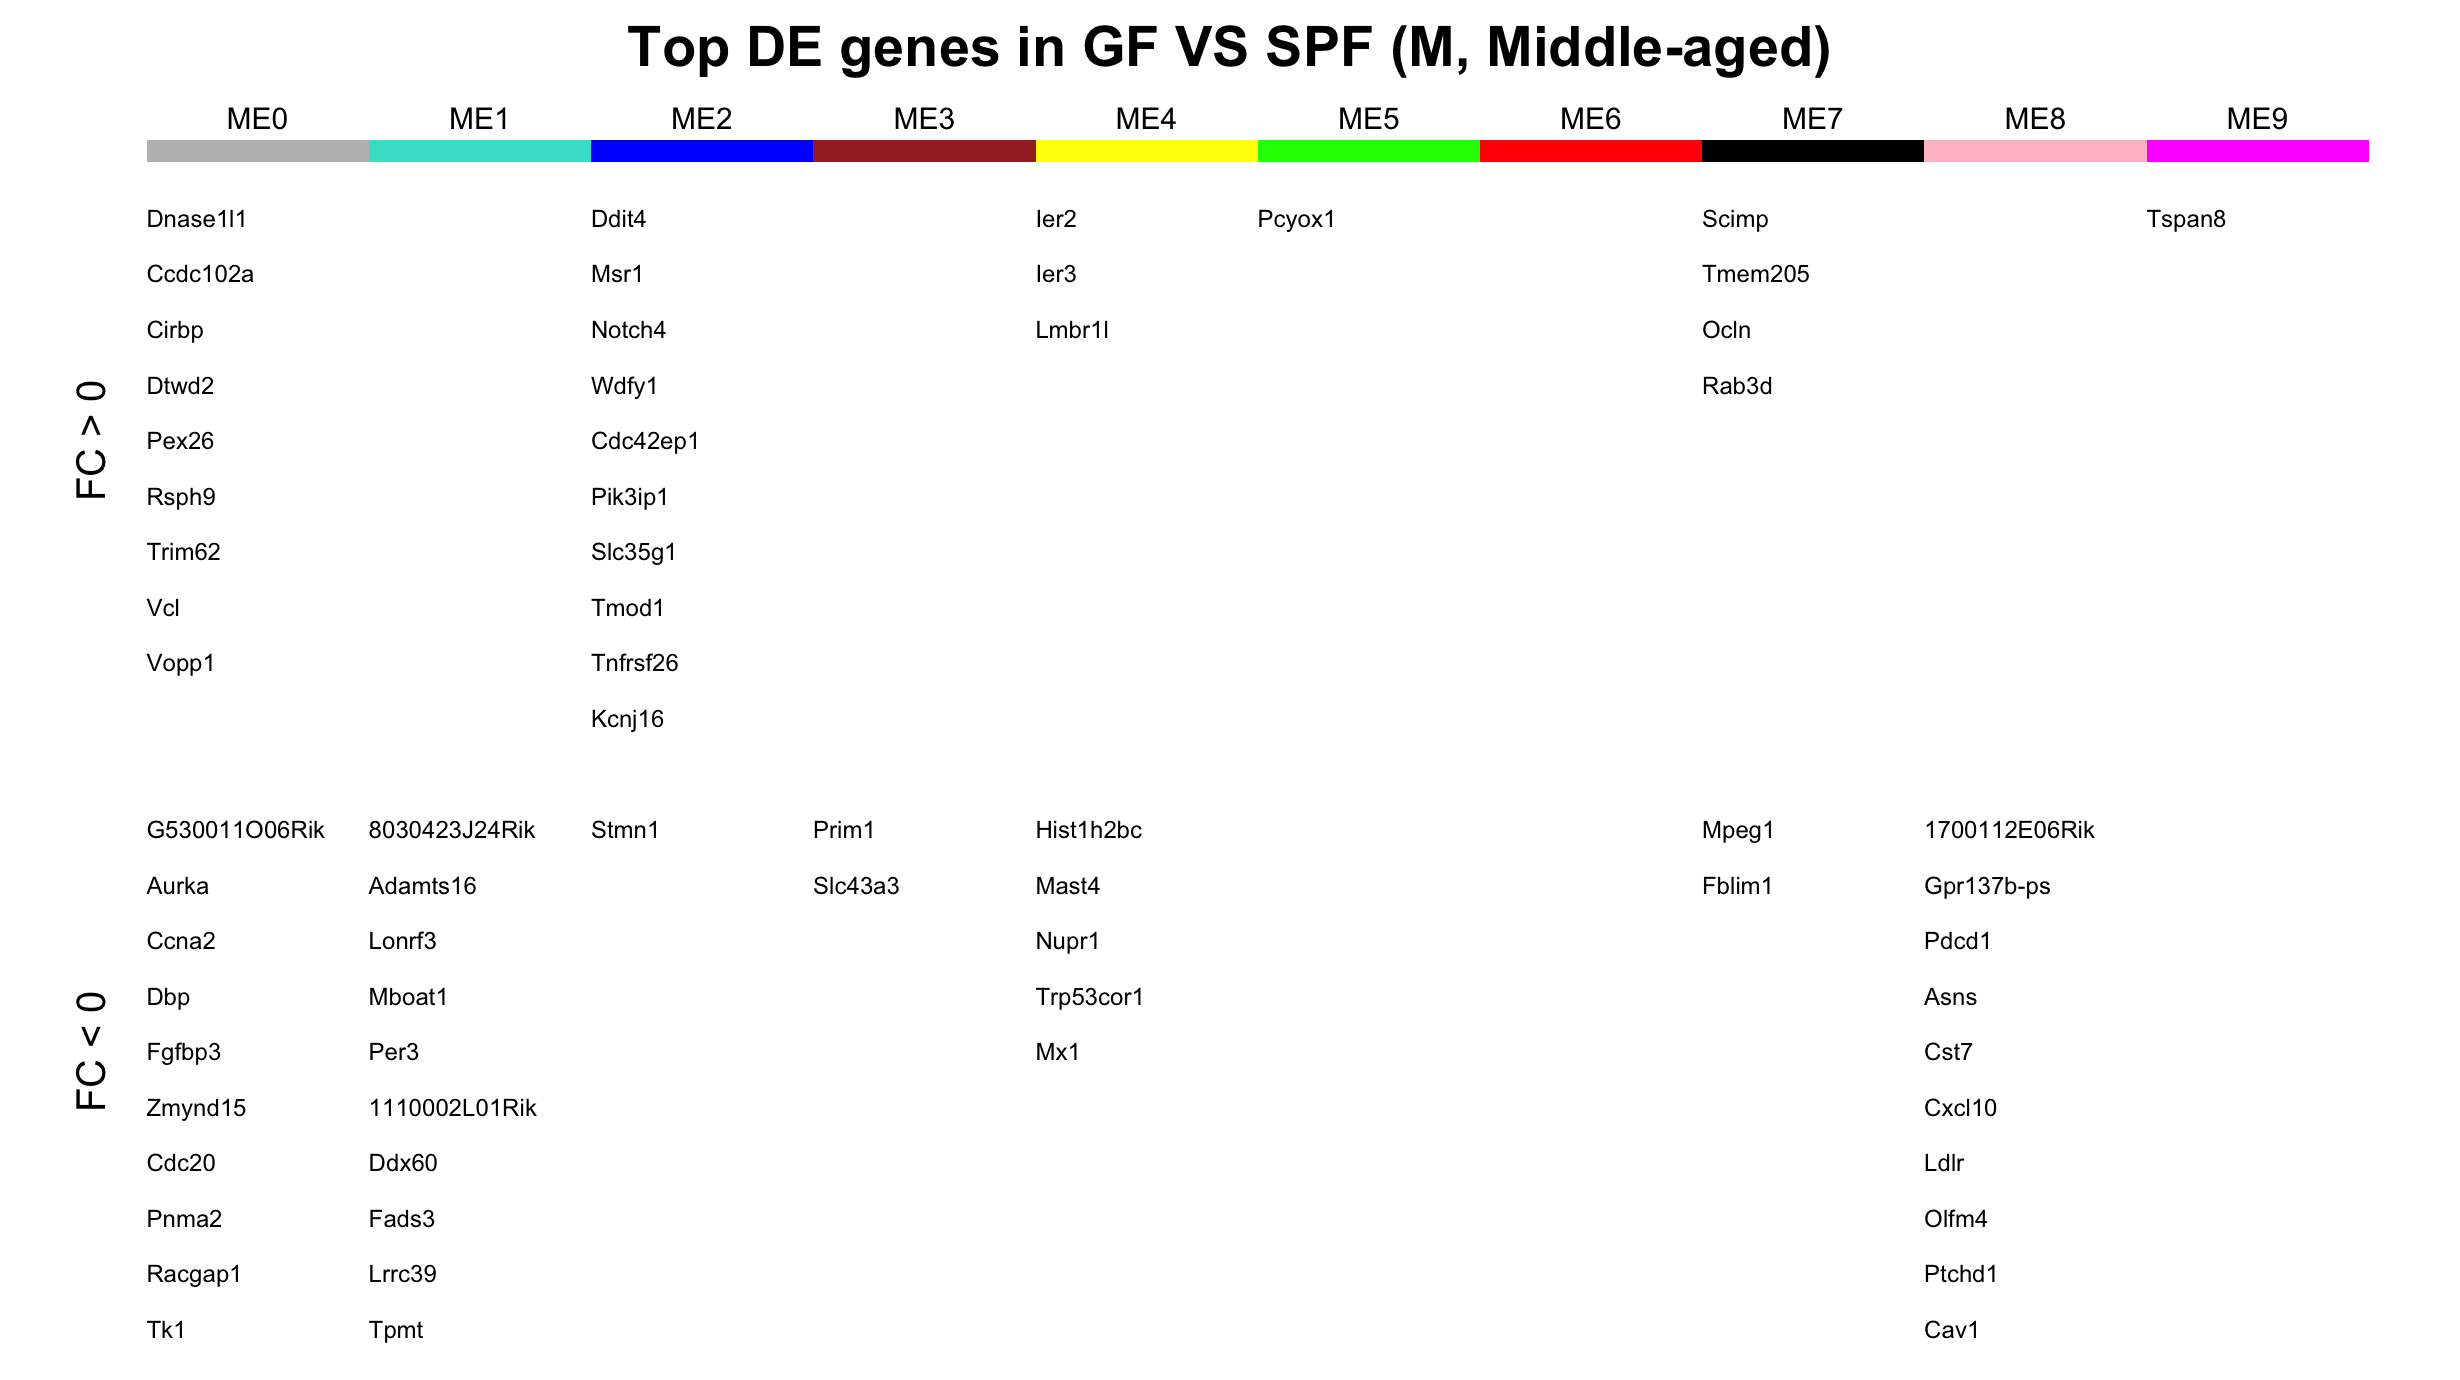

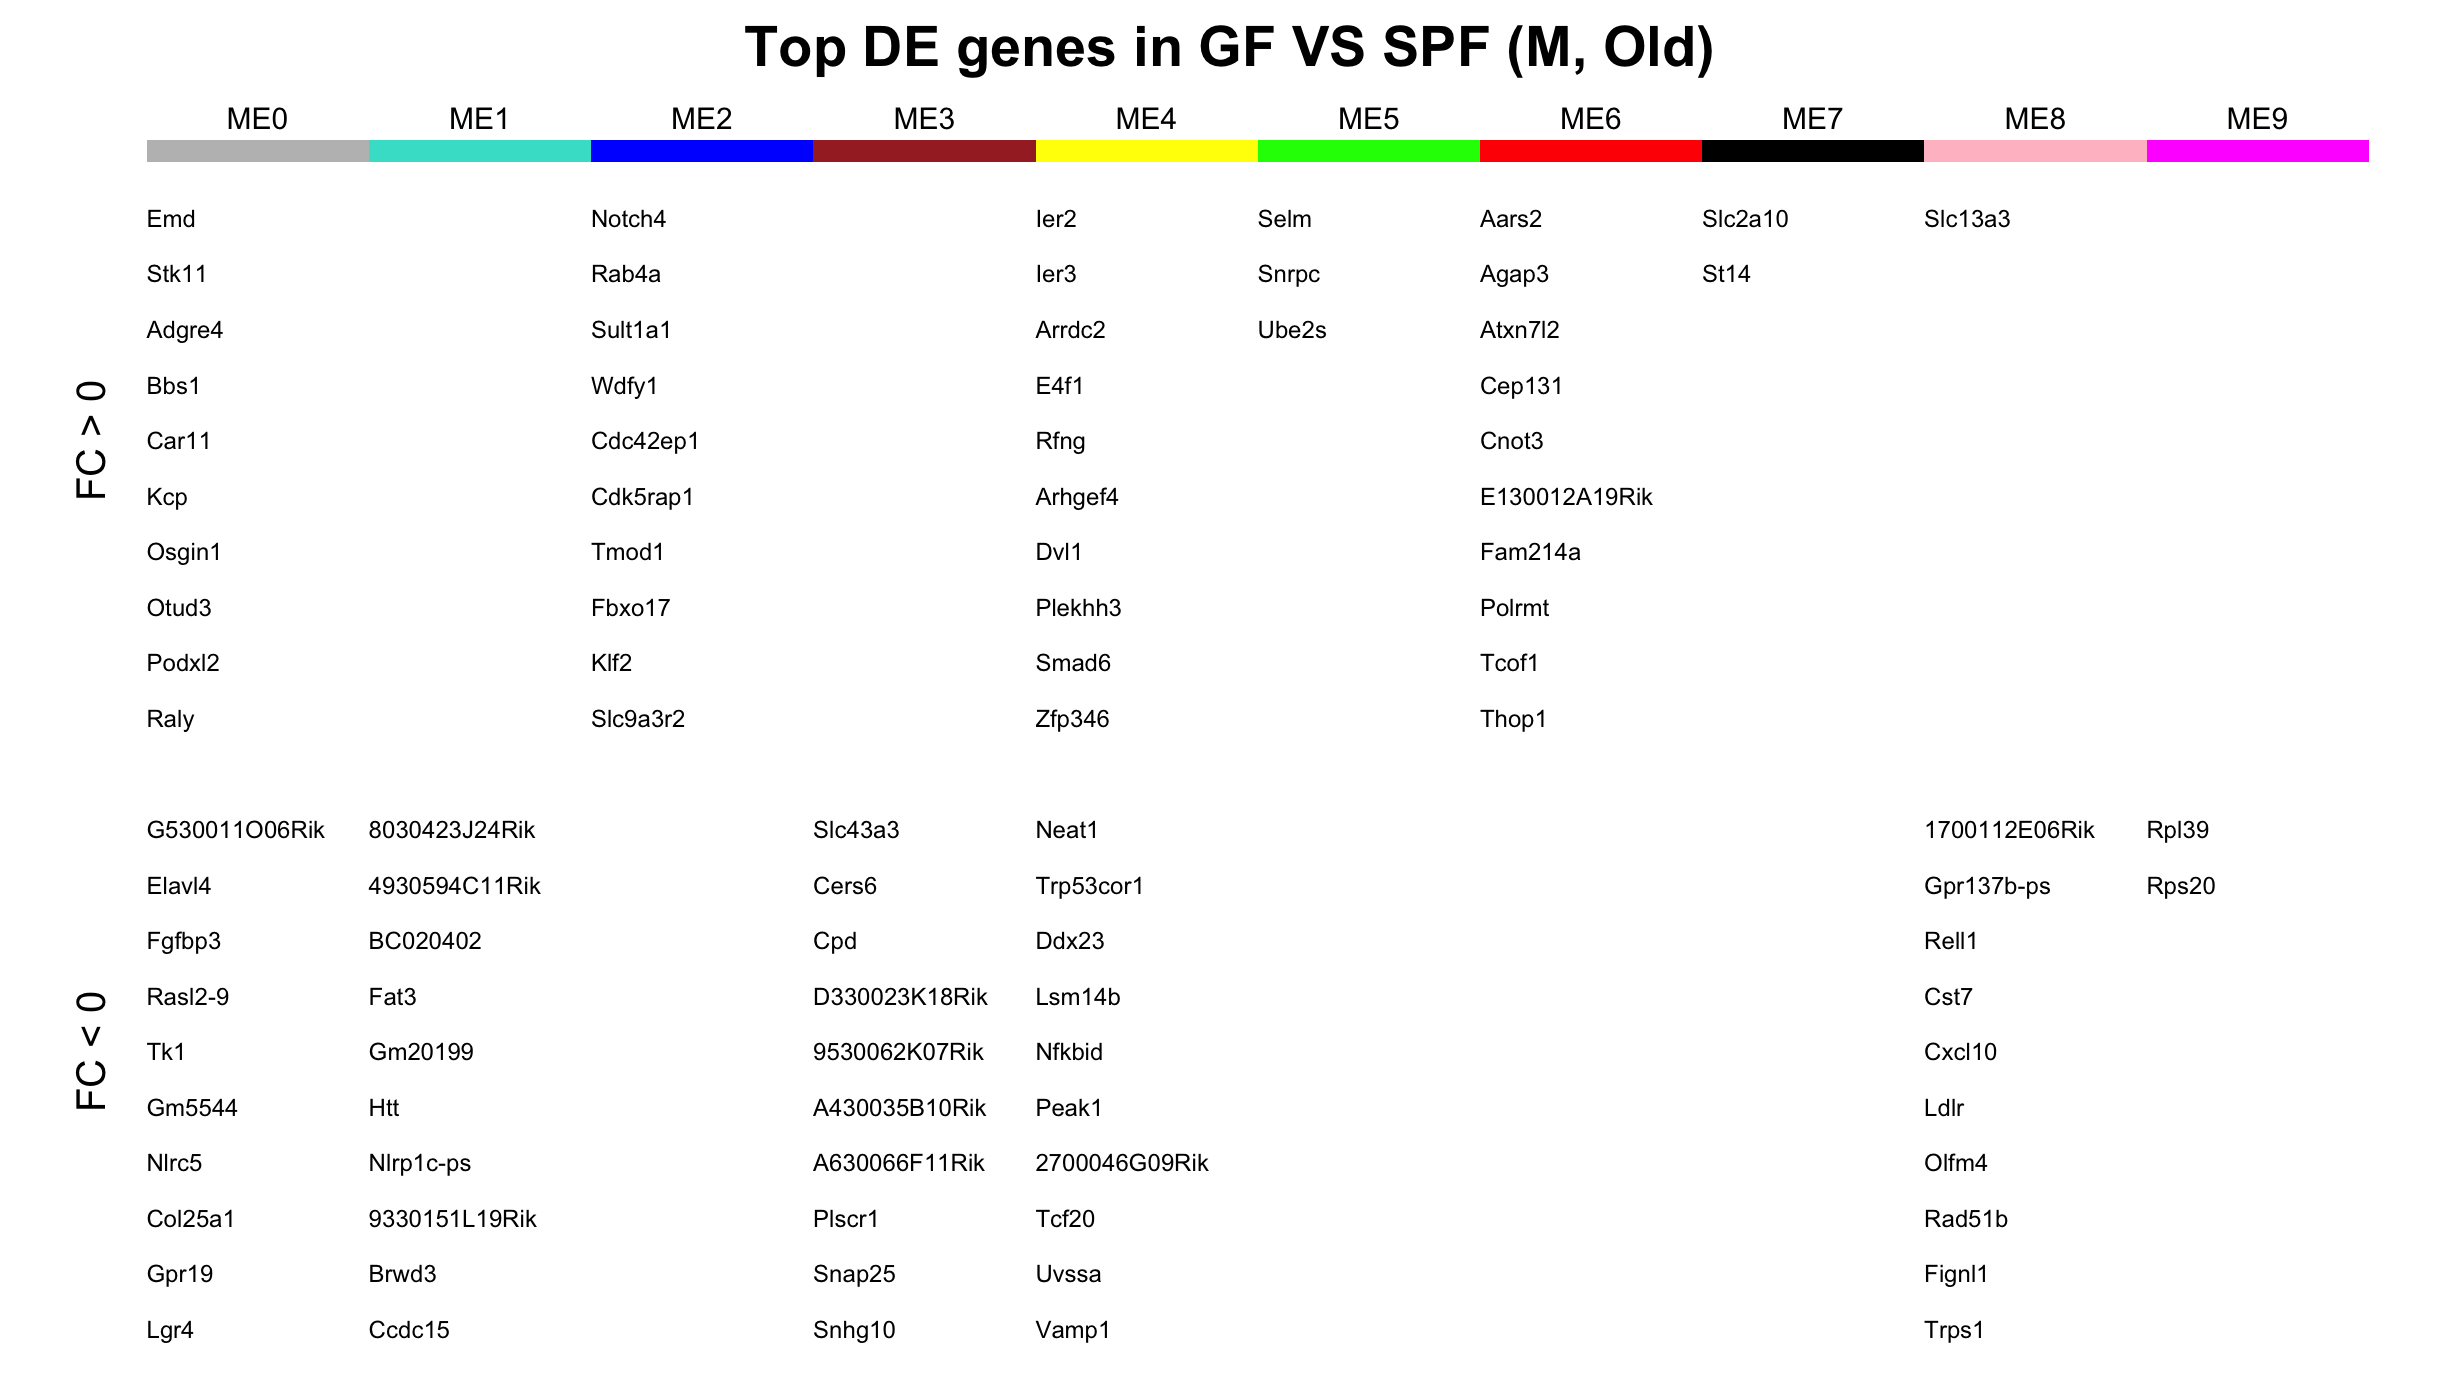

In [303]:
for(comp in comps){
    plot_top_deg_in_modules(type_gender_age_deg$sign_fc_deg, comp, genes_in_modules)
}
options(repr.plot.width=7, repr.plot.height=7)

# Enrichment analysis

In [371]:
type_gender_age_deg = fit_proba_weighting_function(type_gender_age_deg, gene_length)

Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”

## GO analysis

In [360]:
type_gender_age_deg = extract_GO_terms(type_gender_age_deg, dir_path)

ERROR: Error in names(tmp) = rep(names(map), times = as.numeric(summary(map)[, : attempt to set an attribute on NULL


In [372]:
goseq(type_gender_age_deg$pwf[[1]], 'mm10', 'geneSymbol')

Fetching GO annotations...


ERROR: Error in names(tmp) = rep(names(map), times = as.numeric(summary(map)[, : attempt to set an attribute on NULL


In [373]:
type_gender_age_deg$pwf[[1]]

DEgenes bias.data pwf        
1     1        657      0.005616822
2     1        911      0.006130941
3     1       1331      0.006833538
4     1       1731      0.007269116
5     1       1848      0.007348083
6     1        945      0.006195337
7     1       3761      0.007931660
8     1       2076      0.007452246
9     1       2833      0.007573099
10    1       1704      0.007248001
11    1       5039      0.008438854
12    1       2491      0.007533963
13    1        554      0.005394314
14    1       6255      0.008523277
15    1       2690      0.007554597
16    1       2267      0.007501777
17    1       1835      0.007340261
18    1       3854      0.007980982
19    1       3010      0.007609035
20    1       6260      0.008523284
21    1       4166      0.008142791
22    1        599      0.005492375
23    1       1917      0.007385930
24    1        790      0.005892848
25    1        660      0.005623196
26    1       2326      0.007512238
27    1       1034      0.006358215
28    1       2682      0.007553722
29    1       6242      0.008523256
30    1       2601      0.007545314
⋮     ⋮       ⋮         ⋮          
19665 0        2735     0.007559766
19666 0        4418     0.008257388
19667 0        3626     0.007861306
19668 0        2286     0.007505347
19669 0        5372     0.008487647
19670 0        2321     0.007511420
19671 0        3507     0.007801854
19672 0        1996     0.007422241
19673 0        3990     0.008052910
19674 0        6334     0.008523333
19675 0        1992     0.007420570
19676 0        1969     0.007410623
19677 0        2701     0.007555820
19678 0        2062     0.007447447
19679 0        2689     0.007554487
19680 0        4348     0.008227805
19681 0        5397     0.008490255
19682 0        5457     0.008495990
19683 0         752     0.005815410
19684 0        6073     0.008522376
19685 0        2784     0.007566009
19686 0        3727     0.007913747
19687 0        5623     0.008508327
19688 0        6911     0.008523335
19689 0        2289     0.007505893
19690 0       10654     0.008523335
19691 0        3976     0.008045564
19692 0        7685     0.008523335
19693 0         692     0.005690779
19694 0           0     0.004118287

In [ ]:
full_go_desc = type_gender_age_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = type_gender_age_deg$GO_wall[[1]][,"category"]

### Biological process

Dot-plot with the 20 most significant p-values for the different comparison

In [ ]:
plot_top_go(type_gender_age_deg,
            "BP",
            40)  

Network based on description similarity

In [ ]:
BP_network = create_GO_network(type_gender_age_deg, "BP", BP_GO)

GF vs SPF | 8w | 52w | 104w
--- | --- | ---
F | | |
M | | |

In [ ]:
par(mfrow=c(2,3),mar=c(0,0,0,0))
plot_GO_networks(BP_network, "GF VS SPF (F, Young)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "GF VS SPF (F, Middle-aged)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "GF VS SPF (F, Old)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "GF VS SPF (M, Young)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "GF VS SPF (M, Middle-aged)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "GF VS SPF (M, Old)", full_go_desc, plot_interactive = FALSE)

#### GF VS SPF (F, Young)

In [ ]:
col = get_GO_network_col(BP_network, "GF VS SPF (F, Young)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_8w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_8w.png)

GO Tree at "../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_8w.png"

#### GF VS SPF (M, Young)

In [ ]:
col = get_GO_network_col(BP_network, "GF VS SPF (M, Young)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_8w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_8w.png)

GO Tree at "../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_8w.png"

#### GF VS SPF (F, Middle-aged)

In [ ]:
col = get_GO_network_col(BP_network, "GF VS SPF (F, Middle-aged)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_52w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_52w.png)

GO Tree at "../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_52w.png"

#### GF VS SPF (M, Middle-aged)

In [ ]:
col = get_GO_network_col(BP_network, "GF VS SPF (M, Middle-aged)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_52w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_52w.png)

GO Tree at "../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_52w.png"

#### GF VS SPF (F, Old)

In [ ]:
col = get_GO_network_col(BP_network, "GF VS SPF (F, Old)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_104w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_104w.png)

GO Tree at "../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_104w.png"

#### GF VS SPF (M, Old)

In [ ]:
col = get_GO_network_col(BP_network, "GF VS SPF (M, Old)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_104w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_104w.png)

GO Tree at "../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_104w.png"

### Cellular components

Dot-plot with the most over-represented CC GO (20 most significant p-values for the different comparison)

In [ ]:
plot_top_go(type_gender_age_deg, "CC", 40)

### Molecular functions

Dot-plot with the most over-represented MF GO (20 most significant p-values for the different comparison)

In [ ]:
plot_top_go(type_gender_age_deg, "MF", 40)

## KEGG pathways

In [ ]:
plot_kegg_pathways(type_gender_age_deg$over_represented_KEGG[,"category"],
                   type_gender_age_deg$fc_deg,
                   "../results/dge/type-effect/type_gender_age/kegg/over_repr_kegg/")

Pathway graphs available at ../results/dge/type-effect/type_gender_age/over_repr_kegg/

In [ ]:
plot_kegg_pathways(type_gender_age_deg$under_represented_KEGG[,"category"],
                   type_gender_age_deg$fc_deg,
                   "../results/dge/type-effect/type_gender_age/kegg/under_repr_kegg/")

Pathway graphs available at ../results/dge/type-effect/type_gender_age/under_repr_kegg/

# Comparison with Erny results

Protocol: 2 months old female mices (GF vs SPF)

In [ ]:
# our data
GF_SPF_F_8w_fc_deg = type_gender_age_deg$fc_deg[,1]
GF_SPF_F_8w_fc_deg = GF_SPF_F_8w_fc_deg[!is.na(GF_SPF_F_8w_fc_deg)]

## Raw comparison of the results

In [ ]:
# Erny data: transform the gene symbol and use log2(FC)
erny_results = read.csv("../data/erny_results.csv")
erny_results[,1] = capFirst(as.character(erny_results[,1]))
erny_results[,2] = as.character(erny_results[,2])
erny_results[,3] = log2(erny_results[,3])
erny_results[erny_results[,1] == "1700001c19rik",1] = "1700001C19Rik"
erny_results[erny_results[,1] == "Fam125a",1] = "Mvb12a"
erny_results[erny_results[,1] == "Sepw1",1] = "Selenow"
erny_results[erny_results[,1] == "Ppapdc3",1] = "Plpp7"
erny_results[erny_results[,1] == "Ccdc101",1] = "Sgf29"
erny_results[erny_results[,1] == "Tcfeb",1] = "Tfeb"
erny_results[erny_results[,1] == "2810408m09rik",1] = "Trp53rka"
erny_results[erny_results[,1] == "2300009a05rik",1] = "2300009A05Rik"
erny_results[erny_results[,1] == "2900010m23rik",1] = "Uqcc2"
erny_results[erny_results[,1] == "Ccdc55",1] = "Nsrp1"
erny_results[erny_results[,1] == "Phf15",1] = "Jade2"
erny_results[erny_results[,1] == "Mobkl2a",1] = "Mob3a"
erny_results[erny_results[,1] == "C030046i01rik",1] = "R3hdm4"
erny_results[erny_results[,1] == "H2-dmb1",1] = "H2-DMb1"
erny_results[erny_results[,1] == "D15ertd621e",1] = "Fam91a1"
erny_results[erny_results[,1] == "Bc030336",1] = "BC030336"
erny_results[erny_results[,1] == "C330007p06rik",1] = "C330007P06Rik"
erny_results[erny_results[,1] == "4931406h21rik",1] = "4931406H21Rik"
erny_results[erny_results[,1] == "Gm13253",1] = "Rps15a-ps4"
erny_results[erny_results[,1] == "Hiatl1",1] = "Mfsd14b"
erny_results[erny_results[,1] == "Bc031353",1] = "Fam214a"
erny_results[erny_results[,1] == "Cep110",1] = "Cntrl"
erny_results[erny_results[,1] == "B130006d01rik",1] = "B130006D01Rik"
erny_results[erny_results[,1] == "D6wsu163e",1] = "D6Wsu163e"
erny_results[erny_results[,1] == "Fam82b",1] = "Rmdn1"
erny_results[erny_results[,1] == "6030458c11rik",1] = "6030458C11Rik"
erny_results[erny_results[,1] == "Smek2",1] = "Ppp4r3b"
erny_results[erny_results[,1] == "9330151l19rik",1] = "9330151L19Rik"
erny_results[erny_results[,1] == "2010015l04rik",1] = "Cfap74"
erny_results[erny_results[,1] == "Ccdc46",1] = "Cep112"
erny_results[erny_results[,1] == "4932438a13rik",1] = "4932438A13Rik"
erny_results[erny_results[,1] == "B930003m22rik",1] = "Cahm"
erny_results[erny_results[,1] == "4933406i18rik",1] = "4933406I18Rik"
erny_results[erny_results[,1] == "4933434e20rik",1] = "4933434E20Rik"
erny_results[erny_results[,1] == "Ccdc90a",1] = "Mcur1"
erny_results[erny_results[,1] == "9930021j03rik",1] = "9930021J03Rik"
erny_results[erny_results[,1] == "E030024n20rik",1] = "E030024N20Rik"
erny_results[erny_results[,1] == "C78339",1] = "Fam8a1"
erny_results[erny_results[,1] == "2700049a03rik",1] = "2700049A03Rik"
erny_results[erny_results[,1] == "9530008l14rik",1] = "Adtrp"
erny_results[erny_results[,1] == "4930578n16rik",1] = "Ccdc173"
erny_results[erny_results[,1] == "Tmem22",1] = "Slc35g2"
erny_results[erny_results[,1] == "Fert2",1] = "Fer"
erny_results[erny_results[,1] == "D830031n03rik",1] = "D830031N03Rik"
erny_results[erny_results[,1] == "A730069n07rik",1] = "Dlc1"
erny_results[erny_results[,1] == "1700020d05rik",1] = "1700020D05Rik"
erny_results[erny_results[,1] == "Nlrp1c",1] = "Nlrp1c-ps"
erny_results[erny_results[,1] == "D3ertd751e",1] = "D3Ertd751e"

In [ ]:
head(erny_results)
head(GF_SPF_F_8w_fc_deg)

In [ ]:
# Comparison btw our and Erny data: matrix with 2 columns (log2FC in our and in Erny data for each genes)
GF_SPF_F_8w_comp = cbind(erny_results[,3], GF_SPF_F_8w_fc_deg[erny_results[,1]])
colnames(GF_SPF_F_8w_comp) = c("erny", "our")
rownames(GF_SPF_F_8w_comp) = erny_results[,1]
'%ni%' = Negate('%in%')
non_genes = names(GF_SPF_F_8w_fc_deg) %ni% erny_results[,1]
GF_SPF_F_8w_comp = rbind(GF_SPF_F_8w_comp, cbind(rep(NA, sum(non_genes)), sort(GF_SPF_F_8w_fc_deg[non_genes], decreasing = T)))
GF_SPF_F_8w_comp[!is.na(GF_SPF_F_8w_comp[,1]) & !is.na(GF_SPF_F_8w_comp[,2]),]

In [ ]:
pheatmap(GF_SPF_F_8w_comp, cluster_rows=F, cluster_cols=F, show_rownames=F, show_colnames=F, color=inferno(10))  

## Detailed comparison

- Checking the correlation between the counts of Erny and our counts
- Re-running a DGE analysis on the Erny's raw counts

In [ ]:
SPF_F_8w_samples = c('SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2')
GF_F_8w_samples = c('GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2')
SPF_8w_counts = counts[,SPF_F_8w_samples]
GF_8w_counts = counts[,GF_F_8w_samples]

In [ ]:
# Erny data: counts and try to correlate them with our counts
erny_counts = read.csv("../data/erny_counts.csv")
erny_counts[,1] = capFirst(as.character(erny_counts[,1]))
rownames(erny_counts) = erny_counts[,2]
erny_counts = erny_counts[,c(1,4:17)]
erny_counts[erny_counts[,1] == "1700001c19rik",1] = "1700001C19Rik"
erny_counts[erny_counts[,1] == "Fam125a",1] = "Mvb12a"
erny_counts[erny_counts[,1] == "Sepw1",1] = "Selenow"
erny_counts[erny_counts[,1] == "Ppapdc3",1] = "Plpp7"
erny_counts[erny_counts[,1] == "Ccdc101",1] = "Sgf29"
erny_counts[erny_counts[,1] == "Tcfeb",1] = "Tfeb"
erny_counts[erny_counts[,1] == "2810408m09rik",1] = "Trp53rka"
erny_counts[erny_counts[,1] == "2300009a05rik",1] = "2300009A05Rik"
erny_counts[erny_counts[,1] == "2900010m23rik",1] = "Uqcc2"
erny_counts[erny_counts[,1] == "Ccdc55",1] = "Nsrp1"
erny_counts[erny_counts[,1] == "Phf15",1] = "Jade2"
erny_counts[erny_counts[,1] == "Mobkl2a",1] = "Mob3a"
erny_counts[erny_counts[,1] == "C030046i01rik",1] = "R3hdm4"
erny_counts[erny_counts[,1] == "H2-dmb1",1] = "H2-DMb1"
erny_counts[erny_counts[,1] == "D15ertd621e",1] = "Fam91a1"
erny_counts[erny_counts[,1] == "Bc030336",1] = "BC030336"
erny_counts[erny_counts[,1] == "C330007p06rik",1] = "C330007P06Rik"
erny_counts[erny_counts[,1] == "4931406h21rik",1] = "4931406H21Rik"
erny_counts[erny_counts[,1] == "Gm13253",1] = "Rps15a-ps4"
erny_counts[erny_counts[,1] == "Hiatl1",1] = "Mfsd14b"
erny_counts[erny_counts[,1] == "Bc031353",1] = "Fam214a"
erny_counts[erny_counts[,1] == "Cep110",1] = "Cntrl"
erny_counts[erny_counts[,1] == "B130006d01rik",1] = "B130006D01Rik"
erny_counts[erny_counts[,1] == "D6wsu163e",1] = "D6Wsu163e"
erny_counts[erny_counts[,1] == "Fam82b",1] = "Rmdn1"
erny_counts[erny_counts[,1] == "6030458c11rik",1] = "6030458C11Rik"
erny_counts[erny_counts[,1] == "Smek2",1] = "Ppp4r3b"
erny_counts[erny_counts[,1] == "9330151l19rik",1] = "9330151L19Rik"
erny_counts[erny_counts[,1] == "2010015l04rik",1] = "Cfap74"
erny_counts[erny_counts[,1] == "Ccdc46",1] = "Cep112"
erny_counts[erny_counts[,1] == "4932438a13rik",1] = "4932438A13Rik"
erny_counts[erny_counts[,1] == "B930003m22rik",1] = "Cahm"
erny_counts[erny_counts[,1] == "4933406i18rik",1] = "4933406I18Rik"
erny_counts[erny_counts[,1] == "4933434e20rik",1] = "4933434E20Rik"
erny_counts[erny_counts[,1] == "Ccdc90a",1] = "Mcur1"
erny_counts[erny_counts[,1] == "9930021j03rik",1] = "9930021J03Rik"
erny_counts[erny_counts[,1] == "E030024n20rik",1] = "E030024N20Rik"
erny_counts[erny_counts[,1] == "C78339",1] = "Fam8a1"
erny_counts[erny_counts[,1] == "2700049a03rik",1] = "2700049A03Rik"
erny_counts[erny_counts[,1] == "9530008l14rik",1] = "Adtrp"
erny_counts[erny_counts[,1] == "4930578n16rik",1] = "Ccdc173"
erny_counts[erny_counts[,1] == "Tmem22",1] = "Slc35g2"
erny_counts[erny_counts[,1] == "Fert2",1] = "Fer"
erny_counts[erny_counts[,1] == "D830031n03rik",1] = "D830031N03Rik"
erny_counts[erny_counts[,1] == "A730069n07rik",1] = "Dlc1"
erny_counts[erny_counts[,1] == "1700020d05rik",1] = "1700020D05Rik"
erny_counts[erny_counts[,1] == "Nlrp1c",1] = "Nlrp1c-ps"
erny_counts[erny_counts[,1] == "D3ertd751e",1] = "D3Ertd751e"

In [ ]:
# Extract counts comparable with our counts
comparable = which(erny_counts[,1] %in% rownames(GF_8w_counts))
erny_GF_counts = erny_counts[comparable,c("Symbols",paste("GF_", 1:5, sep=""),paste("GF_", 7:8, sep=""))]
erny_SPF_counts = erny_counts[comparable,c("Symbols",paste("SPF_", 1:4, sep=""),paste("SPF_", 6:8, sep=""))]
# Extract counts comparable with Erny's counts
GF_F_8w_counts = GF_8w_counts[erny_GF_counts[,1],]
SPF_F_8w_counts = SPF_8w_counts[erny_SPF_counts[,1],]
# Check again the genes
genes = which(erny_GF_counts[,1] == rownames(GF_F_8w_counts))
erny_GF_counts = erny_GF_counts[genes,]
erny_SPF_counts = erny_SPF_counts[genes,]
GF_F_8w_counts = GF_F_8w_counts[genes,]
SPF_F_8w_counts = SPF_F_8w_counts[genes,]
sum(erny_SPF_counts[,1] != rownames(SPF_F_8w_counts))
sum(erny_SPF_counts[,1] == rownames(SPF_F_8w_counts))
# Compute correlation between the counts of Erny and ours
sapply(1:dim(SPF_F_8w_counts)[2], function(y) return(sapply(2:dim(erny_SPF_counts)[2], function(x) cor.test(SPF_F_8w_counts[,y],erny_SPF_counts[,x])$estimate)))
sapply(1:dim(GF_F_8w_counts)[2], function(y) return(sapply(2:dim(erny_GF_counts)[2], function(x) cor.test(GF_F_8w_counts[,y],erny_GF_counts[,x])$estimate)))
sapply(1:dim(GF_F_8w_counts)[2], function(y) return(sapply(2:dim(erny_SPF_counts)[2], function(x) cor.test(GF_F_8w_counts[,y],erny_SPF_counts[,x])$estimate)))
sapply(2:dim(erny_GF_counts)[2], function(y) return(sapply(2:dim(erny_SPF_counts)[2], function(x) cor.test(erny_GF_counts[,y],erny_SPF_counts[,x])$estimate)))
sapply(1:dim(SPF_F_8w_counts)[2], function(y) return(sapply(2:dim(GF_F_8w_counts)[2], function(x) cor.test(SPF_F_8w_counts[,y],GF_F_8w_counts[,x])$estimate)))

In [ ]:
# Run a DGE expression on the Erny counts
erny_dge_counts = erny_counts[,c(2:15)]
head(erny_dge_counts)
erny_metadata = matrix(c(rep("GF",7),rep("SPF",7)))
colnames(erny_metadata) = c("type")
# Construct DESeqDataSet
erny_dds = DESeqDataSetFromMatrix(
        countData = erny_dge_counts,
        colData = erny_metadata,
        design = ~ type)
# Organize levels of the factors (8w being the reference)
erny_dds$type = relevel(erny_dds$type, ref="SPF")
# Differential expression analysis
erny_dge = DESeq(erny_dds)

In [ ]:
# Extraction of DE genes
erny_dge_res = results(erny_dge, alpha=0.05, test="Wald")
erny_sign_deg = erny_dge_res[which(erny_dge_res$padj < 0.05),]

In [ ]:
# Run a DGE expression on our counts with only the F 8w samples
SPF_GF_8w_F_counts = cbind(GF_8w_counts, SPF_8w_counts)
SPF_GF_8w_F_metadata = matrix(t(sapply(sapply(colnames(SPF_GF_8w_F_counts), strsplit, split = "_"), unlist))[,1])
colnames(SPF_GF_8w_F_metadata) = c("type")
# Construct DESeqDataSet
SPF_GF_8w_F_dds = DESeqDataSetFromMatrix(
        countData = SPF_GF_8w_F_counts,
        colData = SPF_GF_8w_F_metadata,
        design = ~ type)
# Organize levels of the factors
SPF_GF_8w_F_dds$type = relevel(SPF_GF_8w_F_dds$type, ref="SPF")
# Differential expression analysis
SPF_GF_8w_F_dge = DESeq(SPF_GF_8w_F_dds)

In [ ]:
# Extraction of the DE genes
SPF_GF_8w_F_dge_res = results(SPF_GF_8w_F_dge, alpha=0.05, test="Wald")
SPF_GF_8w_F_sign_deg = SPF_GF_8w_F_dge_res[which(SPF_GF_8w_F_dge_res$padj < 0.05),]

In [ ]:
SPF_GF_8w_F_comp = matrix("", nrow=4,ncol=4)
rownames(SPF_GF_8w_F_comp) = c("Original Erny results", "DESeq on Erny counts", "DESeq with only the 8w F", "Full DESeq")
colnames(SPF_GF_8w_F_comp) = rownames(SPF_GF_8w_F_comp)
SPF_GF_8w_F_comp[1,1] = dim(erny_results)[1]
SPF_GF_8w_F_comp[2,2] = dim(erny_sign_deg)[1]
SPF_GF_8w_F_comp[3,3] = dim(SPF_GF_8w_F_sign_deg)[1]
SPF_GF_8w_F_comp[4,4] = length(GF_SPF_F_8w_fc_deg)
SPF_GF_8w_F_comp[1,2] = sum(rownames(erny_sign_deg) %in% erny_results[,2])
SPF_GF_8w_F_comp[1,3] = sum(rownames(SPF_GF_8w_F_sign_deg) %in% erny_results[,1])
SPF_GF_8w_F_comp[1,4] = sum(names(GF_SPF_F_8w_fc_deg) %in% erny_results[,1])
erny_sign_deg_symbols = erny_counts[rownames(erny_sign_deg),1]
SPF_GF_8w_F_comp[2,3] = sum(erny_sign_deg_symbols %in% rownames(SPF_GF_8w_F_sign_deg))
SPF_GF_8w_F_comp[2,4] = sum(erny_sign_deg_symbols %in% names(GF_SPF_F_8w_fc_deg))
SPF_GF_8w_F_comp[3,4] = sum(rownames(SPF_GF_8w_F_sign_deg) %in% names(GF_SPF_F_8w_fc_deg))
SPF_GF_8w_F_comp
#
t1 = rownames(SPF_GF_8w_F_sign_deg[rownames(SPF_GF_8w_F_sign_deg) %in% erny_results[,1],])
t2 = names(GF_SPF_F_8w_fc_deg[names(GF_SPF_F_8w_fc_deg) %in% erny_results[,1]])
sum(t1 %in% t2)
# 
t1 = rownames(SPF_GF_8w_F_sign_deg[rownames(SPF_GF_8w_F_sign_deg) %in% erny_sign_deg_symbols,])
t2 = names(GF_SPF_F_8w_fc_deg[names(GF_SPF_F_8w_fc_deg) %in% erny_sign_deg_symbols])
sum(t1 %in% t2)